In [84]:
import numpy as np
import pandas as pd
import mplhep as hep
import matplotlib as mpl
import matplotlib.pyplot as plt
import uproot
import awkward as ak
import vector
plt.style.use(hep.style.LHCb1)
# {"ALICE" | "ATLAS" | "CMS" | "LHCb1" | "LHCb2"}

from matplotlib import rcParams
config = {"mathtext.fontset":'stix'}
#config = {"mathtext.fontset": "dejavusans"}
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
rcParams.update(config)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [85]:
track = "DD"
track_type = 5

In [86]:
# Load data for one file only
KK_data = uproot.open(f"./data/NTuples/RD/L0phh_18MU.root:B2L0pbarKpKp")
KK_data = KK_data['DecayTree']
KK_data = KK_data.arrays()

In [87]:
# Load MC for one file only
KK_mc = uproot.open(f"./data/NTuples/MC/MCB2L0PbarKpKp/MCB2L0PbarKpKp_18MU.root:B2L0pbarKpKp")
# List what's inside the root file
KK_mc = KK_mc['DecayTree']
KK_mc = KK_mc.arrays()

Print the fields of the MC
#print(KK_mc.fields)


SyntaxError: invalid syntax (1177937479.py, line 7)

In [ ]:
KK_mc = KK_mc.arrays()

AttributeError: no field named 'arrays'

In [ ]:
KK_data["Bu_DTFL0_M"] = KK_data["Bu_DTFL0_M"]
KK_mc["Bu_DTFL0_M"] = KK_mc["Bu_DTFL0_M"]
blind = (KK_data["Bu_DTFL0_M"] < (5279-50)) | (KK_data["Bu_DTFL0_M"] > (5279+50)) 

In [ ]:
def plot_data(ax, data: list, range: list, bins, label):
    data_hist, bins = np.histogram(data, range=range, bins=bins)
    data_hist_errors = np.sqrt(data_hist)
    bin_center = (bins[1:] + bins[:-1]) / 2
    ax.errorbar(x=bin_center, y=data_hist, yerr=data_hist_errors, fmt="ko", label=label)
    return ax
def plot_normalized_data(ax, data: list, label, histstyle):
    data_hist, bins = np.histogram(data, density=True, **histstyle)  # Calculate normalized histogram
    data_hist_errors = np.sqrt(data_hist / len(data) * np.sum(data_hist))
    bin_center = (bins[1:] + bins[:-1]) / 2
    bin_width = (bins[1] - bins[0])  # Calculate the bin width
    ax.errorbar(x=bin_center, y=data_hist, yerr=data_hist_errors, xerr=bin_width / 2, fmt="o", label=label, linewidth=2)
    return ax

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2217,) + inhomogeneous part.

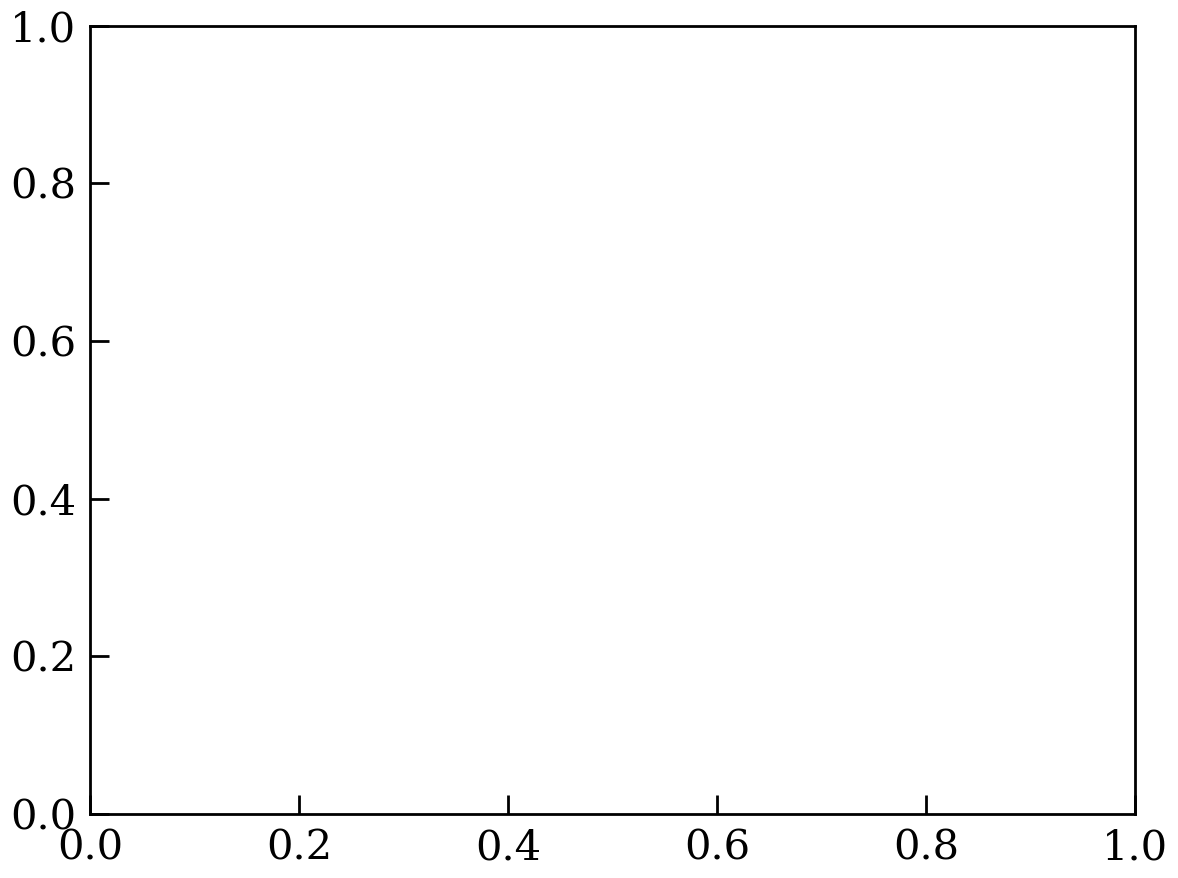

In [ ]:
fig, ax = plt.subplots()
final_selection = (blind )
plot_data(ax, KK_data["Bu_DTFL0_M"][final_selection].tolist(), [5000, 5500], 100, r"$B^+\to \Lambda^0\bar{p} K^{+} K^{+}$ data")
plt.hist(KK_mc["Bu_DTFL0_M"], weights=[0.004]*len(KK_mc),range=[5000, 5500], bins=100, histtype='step', color='red', label=r"$B^+\to \Lambda^0\bar{p} K^{+} K^{+}$ MC")
ax.axvline(x=5279-50, ymax=0.6, color="red", ls="--")
ax.axvline(x=5279+50, ymax=0.6, color="red", ls="--")
ax.set_title(f"Trigger && $\Lambda^0 {track}$ samples", fontsize=40)
ax.set_xlabel(r"M($\Lambda^0\bar{p} K^{+} K^{+}$)")
ax.xaxis.set_label_coords(0.6, -0.1) # Center the x-axis label between the ticks
ax.set_ylabel(r"Events / (5 MeV/$c^2$)")
ax.set_ylim([0, ax.get_ylim()[1]])  # Automatically adjust the upper limit
ax.legend(fontsize=25)
plt.savefig("./plots/B2L0pbarKpKp/Bu_M.pdf")

In [ ]:
def calculate_invariant_mass_aw(data):
    h1pe, h2pe = data["h1_P"], data["h2_P"]
    h1px, h2px = data["h1_PX"], data["h2_PX"]
    h1py, h2py = data["h1_PY"], data["h2_PY"]
    h1pz, h2pz = data["h1_PZ"], data["h2_PZ"]
    h1m, h2m = data["h1_M"], data["h2_M"]

    energy1 = np.sqrt(h1pe**2 + h1m**2)
    energy2 = np.sqrt(h2pe**2 + h2m**2)
    invariant_mass = np.sqrt(h1m**2 + h2m**2 + 2*(energy1*energy2 - h1px*h2px - h1py*h2py - h1pz*h2pz))

    # Handling NaN or Inf values
    invariant_mass = np.nan_to_num(invariant_mass, nan=0.0, posinf=0.0, neginf=0.0)

    return invariant_mass

In [ ]:
# Calculate invariant mass for both data and MC using the pandas DataFrame
KK_data["KK_M"] = calculate_invariant_mass_aw(KK_data)
KK_mc["KK_M"] = calculate_invariant_mass_aw(KK_mc)

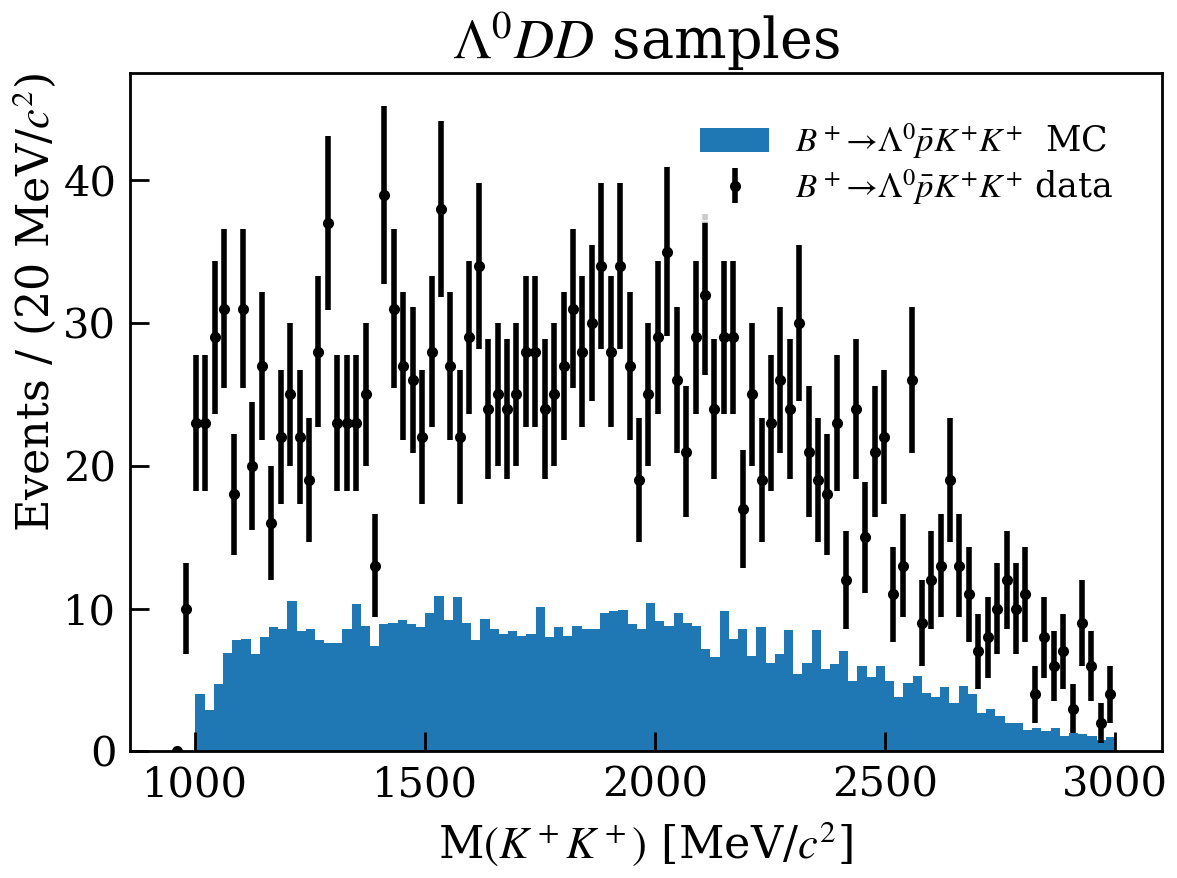

In [ ]:
# Plotting
fig, ax = plt.subplots()
plt.hist(KK_mc["KK_M"], weights=[0.1]*len(KK_mc), range=[1000, 3000], bins=100, label=r"$B^+\to \Lambda^0\bar{p} K^{+} K^{+}$  MC")
plot_data(ax, KK_data["KK_M"].tolist(), [950, 3000], 100, r"$B^+\to \Lambda^0\bar{p} K^{+} K^{+}$ data")

ax.set_title(f"$\Lambda^0 {track}$ samples", fontsize=40)
ax.set_xlabel(r"M$(K^+K^+)$ [MeV/$c^2$]")
ax.xaxis.set_label_coords(0.7, -0.1) # Center the x-axis label between the ticks
ax.set_ylabel(r"Events / (20 MeV/$c^2$)")
ax.set_ylim([0, ax.get_ylim()[1]])  # Automatically adjust the upper limit
ax.legend(fontsize=25)
plt.savefig(f"./plots/B2L0pbarKpKp/MKK.pdf")
plt.show()

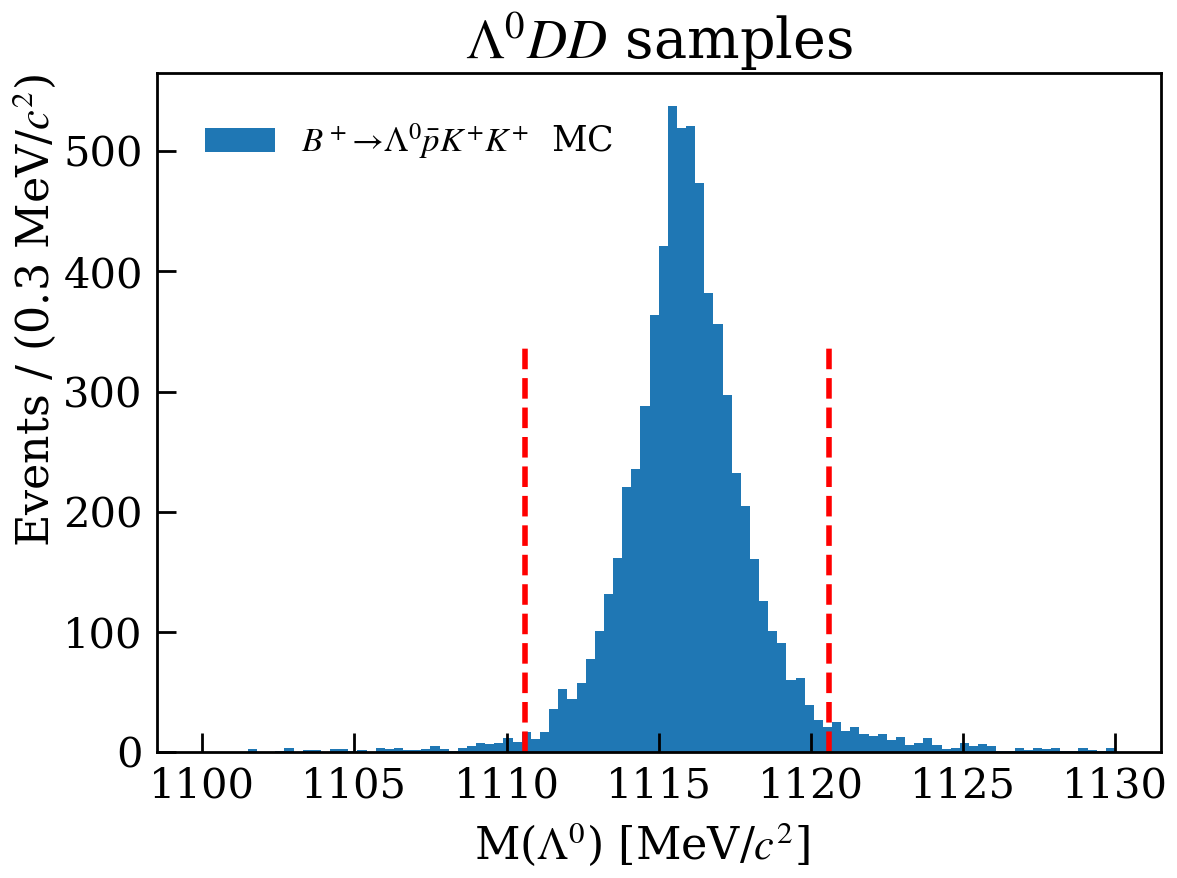

In [ ]:
fig, ax = plt.subplots()
hist_values, bin_edges, _= plt.hist(KK_mc["L0_M"].to_list(),weights=[1]*len(KK_mc), range=[1100, 1130], bins=100, label=r"$B^+\to \Lambda^0\bar{p} K^{+} K^{+}$  MC")
ax.axvline(x=1115.6-5, ymax=0.6, color="red", ls="--")
ax.axvline(x=1115.6+5, ymax=0.6, color="red", ls="--")
ax.set_title(f"$\Lambda^0 {track}$ samples", fontsize=40)
ax.set_xlabel(r"M($\Lambda^0$) [MeV/$c^2$]")
ax.xaxis.set_label_coords(0.65, -0.1) # Center the x-axis label between the ticks
ax.set_ylabel(rf"Events / ({round(bin_edges[1]-bin_edges[0], 3)} MeV/$c^2$)")
ax.legend(loc="upper left", fontsize=25)
plt.savefig(f"./plots/B2L0pbarKpKp/L0_M_{track}.pdf")


In [ ]:
Delta_X = KK_data["L0_ENDVERTEX_X"] - KK_data["Bu_ENDVERTEX_X"]
Delta_Y = KK_data["L0_ENDVERTEX_Y"] - KK_data["Bu_ENDVERTEX_Y"]
Delta_Z = KK_data["L0_ENDVERTEX_Z"] - KK_data["Bu_ENDVERTEX_Z"]
Delta_X_ERR = np.sqrt(np.square(KK_data["Bu_ENDVERTEX_XERR"])+np.square(KK_data["L0_ENDVERTEX_XERR"]))
Delta_Y_ERR = np.sqrt(np.square(KK_data["Bu_ENDVERTEX_YERR"])+np.square(KK_data["L0_ENDVERTEX_YERR"]))
Delta_Z_ERR = np.sqrt(np.square(KK_data["Bu_ENDVERTEX_ZERR"])+np.square(KK_data["L0_ENDVERTEX_ZERR"]))
delta_x = np.divide(Delta_X,Delta_X_ERR)
delta_y = np.divide(Delta_Y,Delta_Y_ERR)
delta_z = np.divide(Delta_Z,Delta_Z_ERR)
L0_FD_CHISQ = np.square(delta_x) + np.square(delta_y) + np.square(delta_z)


Delta_X_mc = KK_mc["L0_ENDVERTEX_X"] - KK_mc["Bu_ENDVERTEX_X"]
Delta_Y_mc = KK_mc["L0_ENDVERTEX_Y"] - KK_mc["Bu_ENDVERTEX_Y"]
Delta_Z_mc = KK_mc["L0_ENDVERTEX_Z"] - KK_mc["Bu_ENDVERTEX_Z"]
Delta_X_ERR_mc = np.sqrt(np.square(KK_mc["Bu_ENDVERTEX_XERR"])+np.square(KK_mc["L0_ENDVERTEX_XERR"]))
Delta_Y_ERR_mc = np.sqrt(np.square(KK_mc["Bu_ENDVERTEX_YERR"])+np.square(KK_mc["L0_ENDVERTEX_YERR"]))
Delta_Z_ERR_mc = np.sqrt(np.square(KK_mc["Bu_ENDVERTEX_ZERR"])+np.square(KK_mc["L0_ENDVERTEX_ZERR"]))
delta_x_mc = np.divide(Delta_X_mc,Delta_X_ERR_mc)
delta_y_mc = np.divide(Delta_Y_mc,Delta_Y_ERR_mc)
delta_z_mc = np.divide(Delta_Z_mc,Delta_Z_ERR_mc)
L0_FD_CHISQ_mc = np.square(delta_x_mc) + np.square(delta_y_mc) + np.square(delta_z_mc)


KK_data["L0_FD_CHISQ"] = L0_FD_CHISQ
KK_mc["L0_FD_CHISQ"] = L0_FD_CHISQ_mc

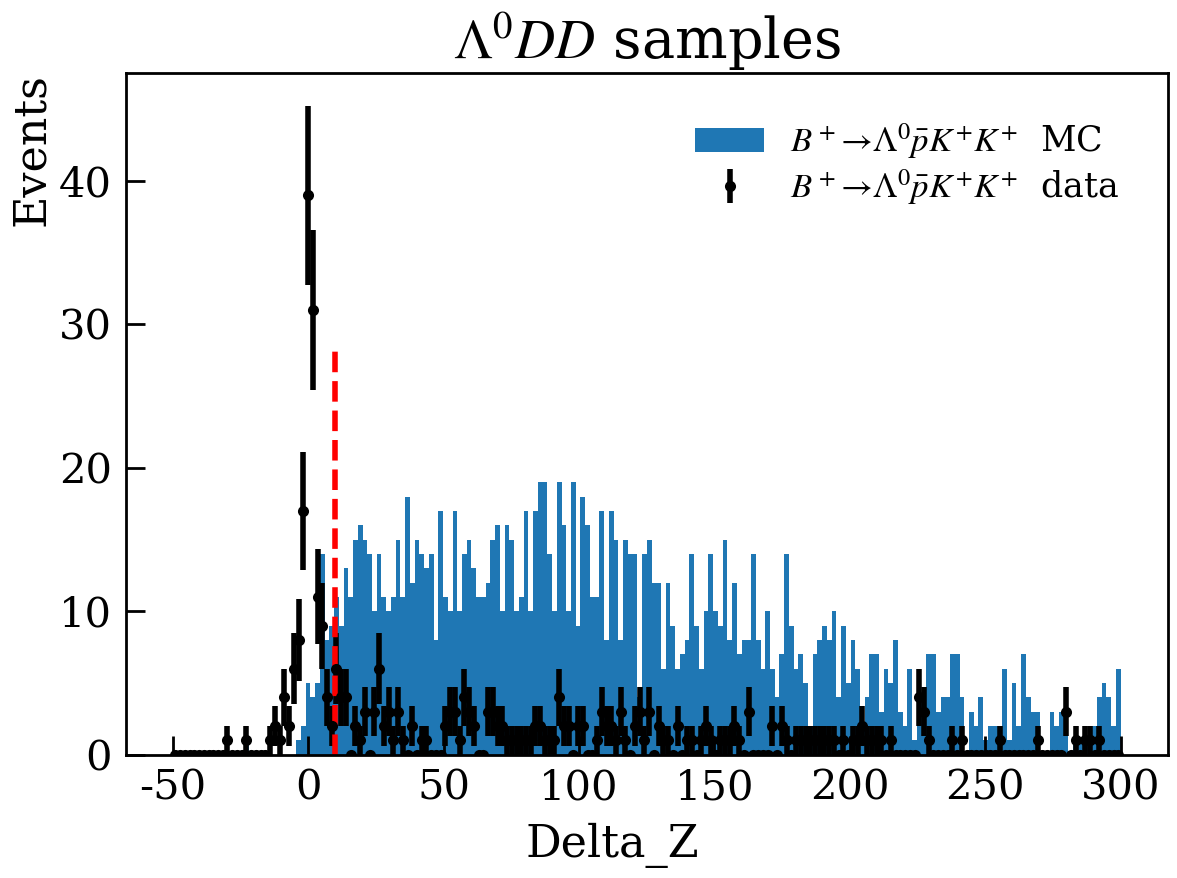

In [ ]:
fig, ax = plt.subplots()
plt.hist(Delta_Z_mc.to_list(),weights=[1]*len(KK_mc), range=[-50, 300], bins=200, label=r"$B^+\to \Lambda^0\bar{p} K^{+} K^{+}$  MC")
plot_data(ax, Delta_Z[np.abs(KK_data["L0_M"]-1115.6)<5].to_list(), [-50, 300], 200, r"$B^+\to \Lambda^0\bar{p} K^{+} K^{+}$  data")
ax.axvline(x=10, ymax=0.6, color="red", ls="--")
ax.set_title(f"$\Lambda^0 {track}$ samples", fontsize=40)
ax.set_xlabel(r"Delta_Z")
ax.xaxis.set_label_coords(0.55, -0.1) # Center the x-axis label between the ticks
ax.set_ylabel(r"Events")
ax.legend(fontsize=25)
plt.savefig(f"./plots/B2L0pbarKpKp/Lambda_{track}_Delta_Z.pdf")

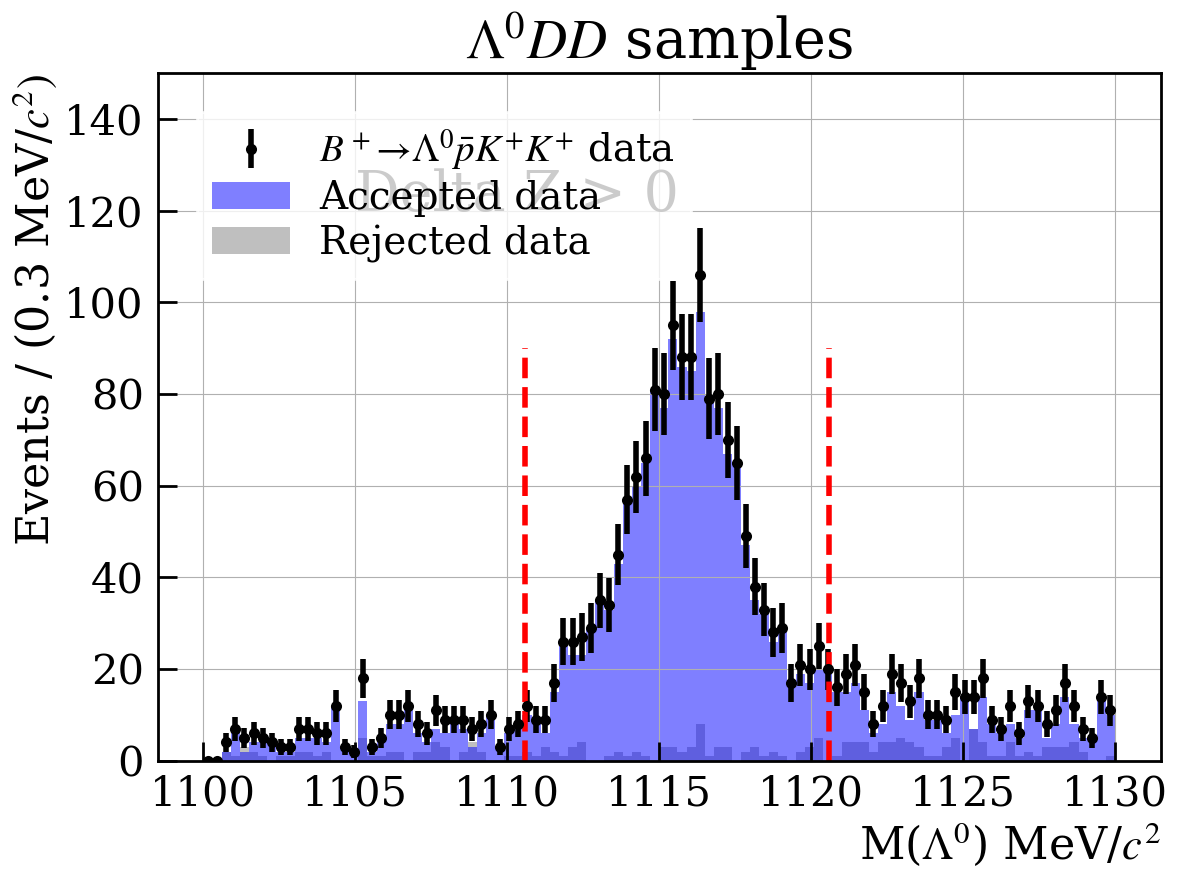

In [ ]:
fig, ax = plt.subplots()
p1 = plot_data(ax, KK_data["L0_M"].to_list(), [1100, 1130], 100, r"$B^+\to \Lambda^0\bar{p} K^{+} K^{+}$ data")
p3 = plt.hist(KK_data["L0_M"][Delta_Z<0], range=[1100, 1130], bins=100, label=r"Rejected data", color='gray', alpha=0.5)
p2 = plt.hist(KK_data["L0_M"][Delta_Z>0], range=[1100, 1130], bins=100, label=r"Accepted data", color='blue', alpha=0.5)
ax.axvline(x=1115.6-5, ymax=0.6, color="red", ls="--")
ax.axvline(x=1115.6+5, ymax=0.6, color="red", ls="--")
ax.set_title(f"$\Lambda^0 {track}$ samples", fontsize=40)
ax.set_xlabel(r"M($\Lambda^0$) MeV/$c^2$")
ax.set_ylabel(r"Events / (0.3 MeV/$c^2)$")
ax.set_ylim([0, 150])
plt.grid()
#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [2,1,0]
#add legend to plot
plt.text(1105, 120, "Delta Z > 0", fontsize=40)
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]) 
plt.savefig(f"./plots/B2L0pbarKpKp/DeltaZ>0_L0M.pdf")

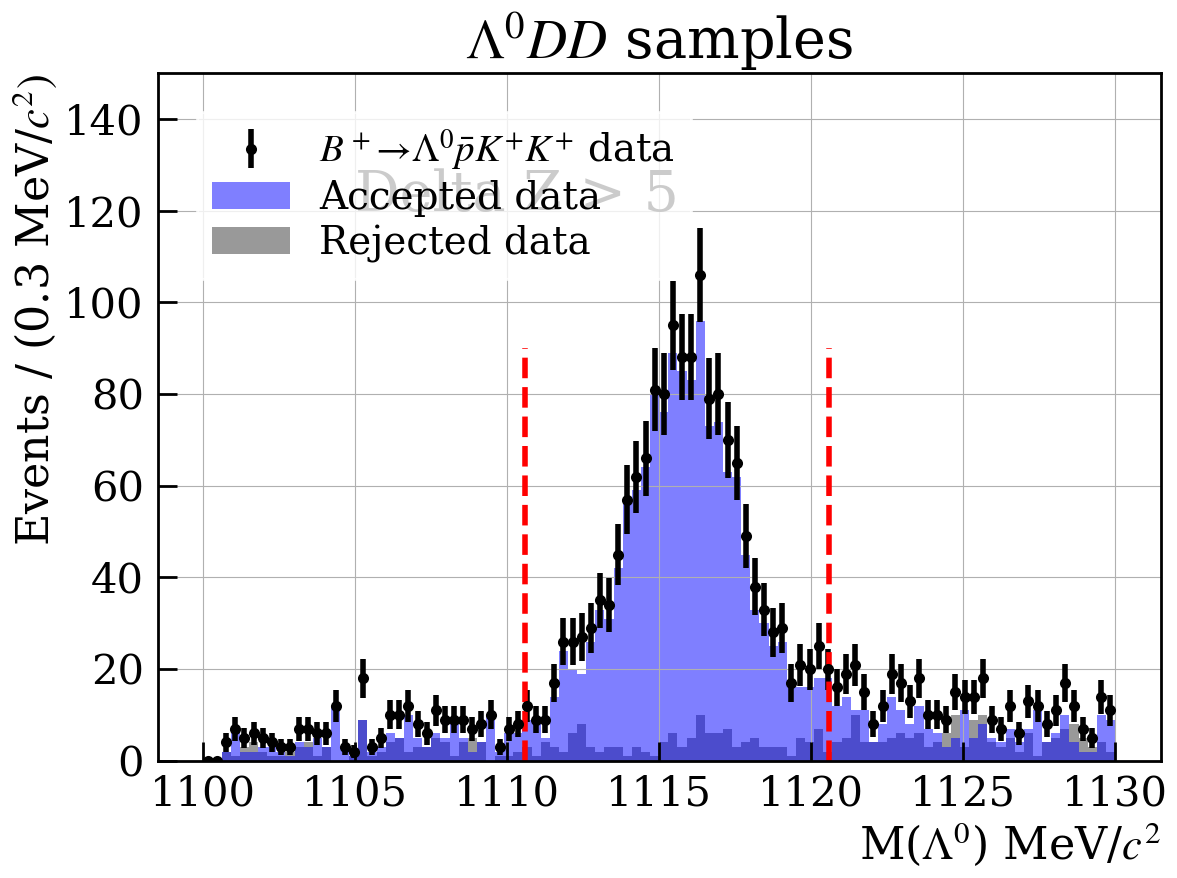

In [ ]:
fig, ax = plt.subplots()
# plot_data(ax, KK_data["Bu_DTFL0_M"][(Delta_Z<0) & blind].to_list(), [5000, 5500], 100, r"$B^+\to \Lambda^0\bar{p} K^{+} K^{+}$ data")
p1 = plot_data(ax, KK_data["L0_M"].to_list(), [1100, 1130], 100, r"$B^+\to \Lambda^0\bar{p} K^{+} K^{+}$ data")
p3 = plt.hist(KK_data["L0_M"][Delta_Z<5], range=[1100, 1130], bins=100, label=r"Rejected data", color='gray', alpha=0.8)
p2 = plt.hist(KK_data["L0_M"][Delta_Z>5], range=[1100, 1130], bins=100, label=r"Accepted data", color='blue', alpha=0.5)
ax.axvline(x=1115.6-5, ymax=0.6, color="red", ls="--")
ax.axvline(x=1115.6+5, ymax=0.6, color="red", ls="--")
ax.set_title(f"$\Lambda^0 {track}$ samples", fontsize=40)
ax.set_xlabel(r"M($\Lambda^0$) MeV/$c^2$")
ax.set_ylabel(r"Events / (0.3 MeV/$c^2)$")
ax.set_ylim([0, 150])
plt.grid()
plt.text(1105, 120, "Delta Z > 5", fontsize=40)

#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [2,1,0]
#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]) 
plt.savefig(f"./plots/B2L0pbarKpKp/DeltaZ>5_L0M.pdf")

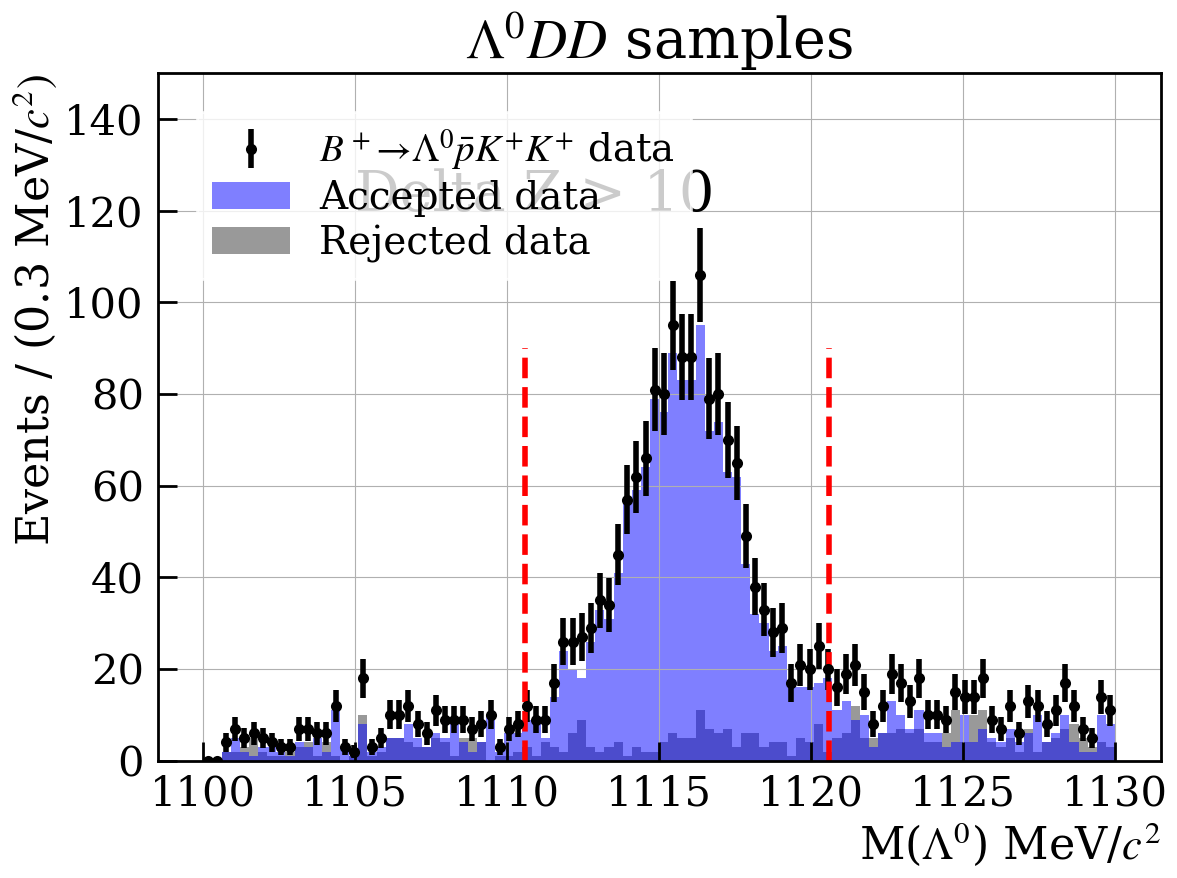

In [ ]:
fig, ax = plt.subplots()
# plot_data(ax, KK_data["Bu_DTFL0_M"][(Delta_Z<0) & blind].to_list(), [5000, 5500], 100, r"$B^+\to \Lambda^0\bar{p} K^{+} K^{+}$ data")
p1 = plot_data(ax, KK_data["L0_M"].to_list(), [1100, 1130], 100, r"$B^+\to \Lambda^0\bar{p} K^{+} K^{+}$ data")
p3 = plt.hist(KK_data["L0_M"][Delta_Z<10], range=[1100, 1130], bins=100, label=r"Rejected data", color='gray', alpha=0.8)
p2 = plt.hist(KK_data["L0_M"][Delta_Z>10], range=[1100, 1130], bins=100, label=r"Accepted data", color='blue', alpha=0.5)
ax.axvline(x=1115.6-5, ymax=0.6, color="red", ls="--")
ax.axvline(x=1115.6+5, ymax=0.6, color="red", ls="--")
ax.set_title(f"$\Lambda^0 {track}$ samples", fontsize=40)
ax.set_xlabel(r"M($\Lambda^0$) MeV/$c^2$")
ax.set_ylabel(r"Events / (0.3 MeV/$c^2)$")
ax.set_ylim([0, 150])
plt.grid()
plt.text(1105, 120, "Delta Z > 10", fontsize=40)

#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [2,1,0]
#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]) 
plt.savefig(f"./plots/B2L0pbarKpKp/DeltaZ>10_L0M.pdf")

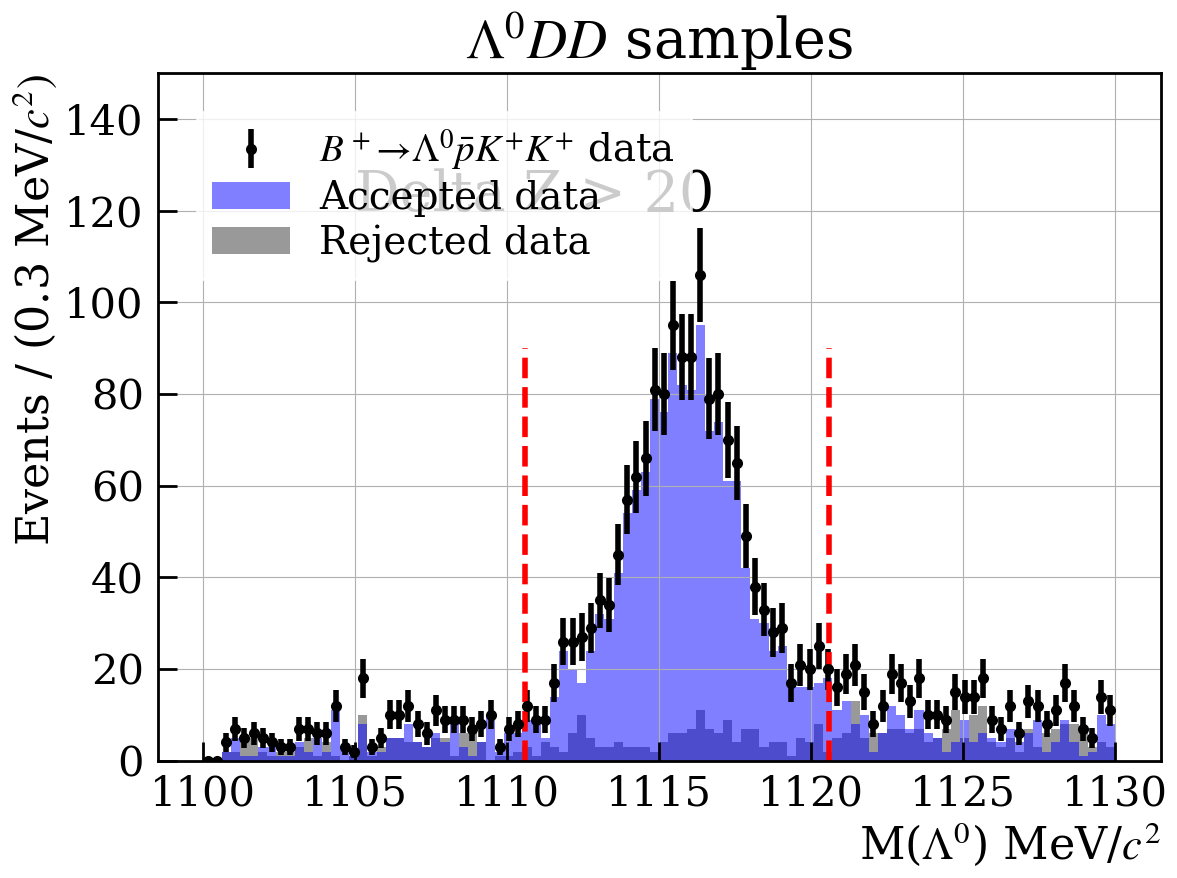

In [ ]:
fig, ax = plt.subplots()
# plot_data(ax, KK_data["Bu_DTFL0_M"][(Delta_Z<0) & blind].to_list(), [5000, 5500], 100, r"$B^+\to \Lambda^0\bar{p} K^{+} K^{+}$ data")
p1 = plot_data(ax, KK_data["L0_M"].to_list(), [1100, 1130], 100, r"$B^+\to \Lambda^0\bar{p} K^{+} K^{+}$ data")
p3 = plt.hist(KK_data["L0_M"][Delta_Z<20], range=[1100, 1130], bins=100, label=r"Rejected data", color='gray', alpha=0.8)
p2 = plt.hist(KK_data["L0_M"][Delta_Z>20], range=[1100, 1130], bins=100, label=r"Accepted data", color='blue', alpha=0.5)
ax.axvline(x=1115.6-5, ymax=0.6, color="red", ls="--")
ax.axvline(x=1115.6+5, ymax=0.6, color="red", ls="--")
ax.set_title(f"$\Lambda^0 {track}$ samples", fontsize=40)
ax.set_xlabel(r"M($\Lambda^0$) MeV/$c^2$")
ax.set_ylabel(r"Events / (0.3 MeV/$c^2)$")
ax.set_ylim([0, 150])
plt.grid()
plt.text(1105, 120, "Delta Z > 20", fontsize=40)

#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [2,1,0]
#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]) 
plt.savefig(f"./plots/B2L0pbarKpKp/DeltaZ>20_L0M.pdf")

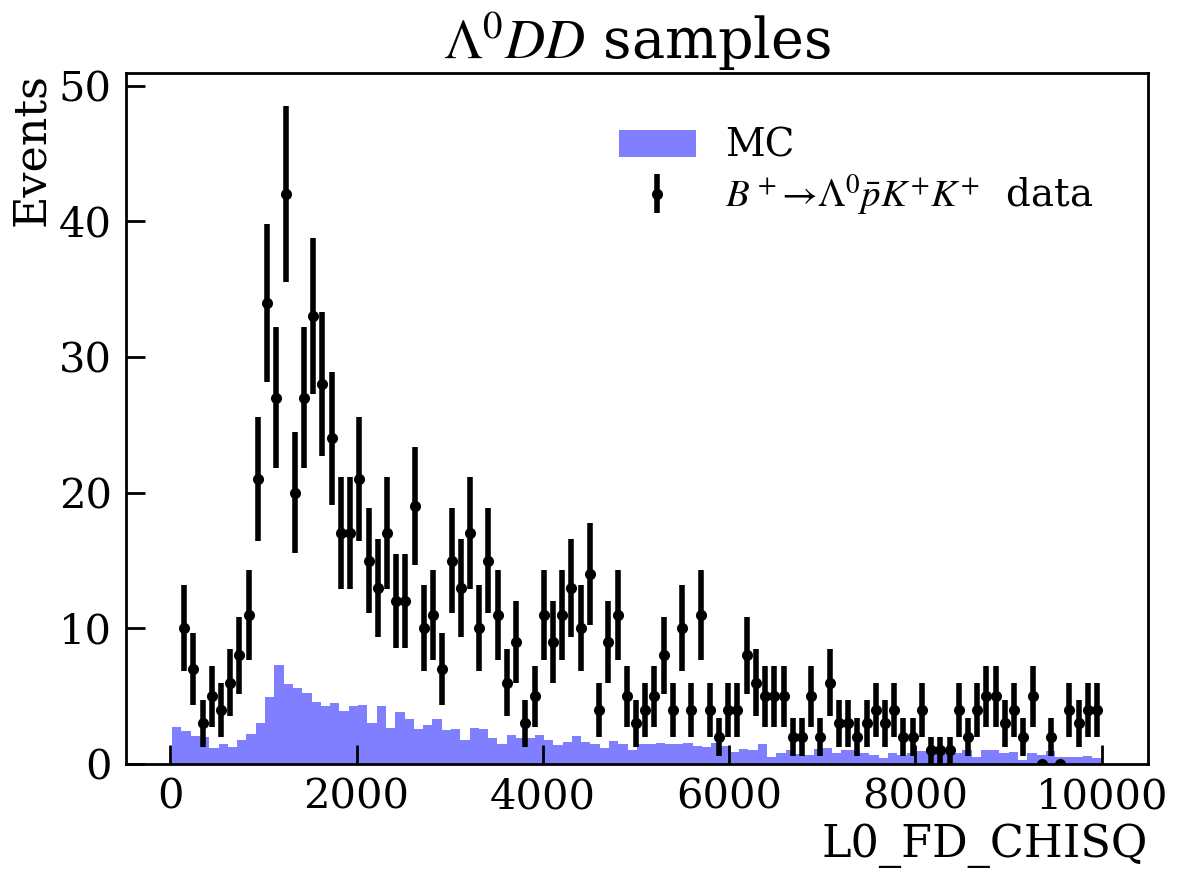

In [ ]:
fig, ax = plt.subplots()
L0_M = KK_data["L0_M"]
p1 = plot_data(ax, L0_FD_CHISQ[(Delta_Z>10)&(np.abs(KK_data["L0_M"]-1115.6)<6)].to_list(), [100, 10000], 100, r"$B^+\to \Lambda^0\bar{p} K^{+} K^{+}$  data")
p2 = plt.hist(L0_FD_CHISQ_mc[Delta_Z_mc>10].to_list(), weights=[0.05]*len(L0_FD_CHISQ_mc[Delta_Z_mc>10]), range=[20, 10000], bins=100, label=r"MC", color='blue', alpha=0.5)
ax.set_title(f"$\Lambda^0 {track}$ samples", fontsize=40)
ax.set_xlabel(r"L0_FD_CHISQ")
ax.set_ylabel(r"Events")

#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [0, 1]
#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]) 
plt.savefig(f"./plots/B2L0pbarKpKp/Lambda_{track}_L0_FD_CHISQ.pdf")

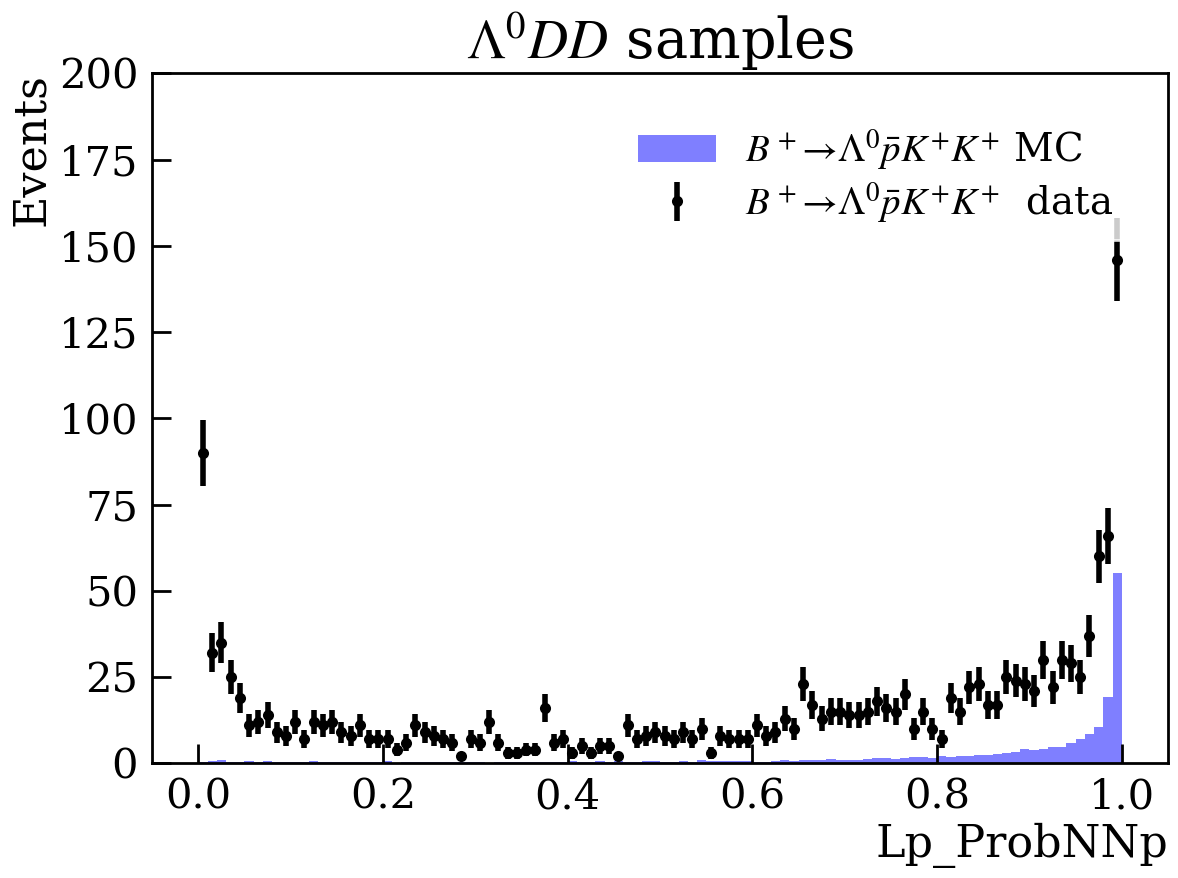

In [ ]:
fig, ax = plt.subplots()
plot_data(ax, KK_data["Lp_ProbNNp"][(np.abs(KK_data["L0_M"]-1115.6)<5)].to_list(), [0, 1], 100, r"$B^+\to \Lambda^0\bar{p} K^{+} K^{+}$  data")
plt.hist(KK_mc["Lp_ProbNNp"], weights=[0.03]*len(KK_mc), range=[0, 1], bins=100, label=r"$B^+\to \Lambda^0\bar{p} K^{+} K^{+}$ MC", color='blue', alpha=0.5)
ax.set_title(f"$\Lambda^0 {track}$ samples", fontsize=40)
ax.set_xlabel(r"Lp_ProbNNp")
ax.set_ylabel(r"Events")
ax.set_ylim([0, 200])
#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [0,1]
#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]) 
plt.savefig(f"./plots/B2L0pbarKpKp/Lambda_{track}_Lp_ProbNNp.pdf")

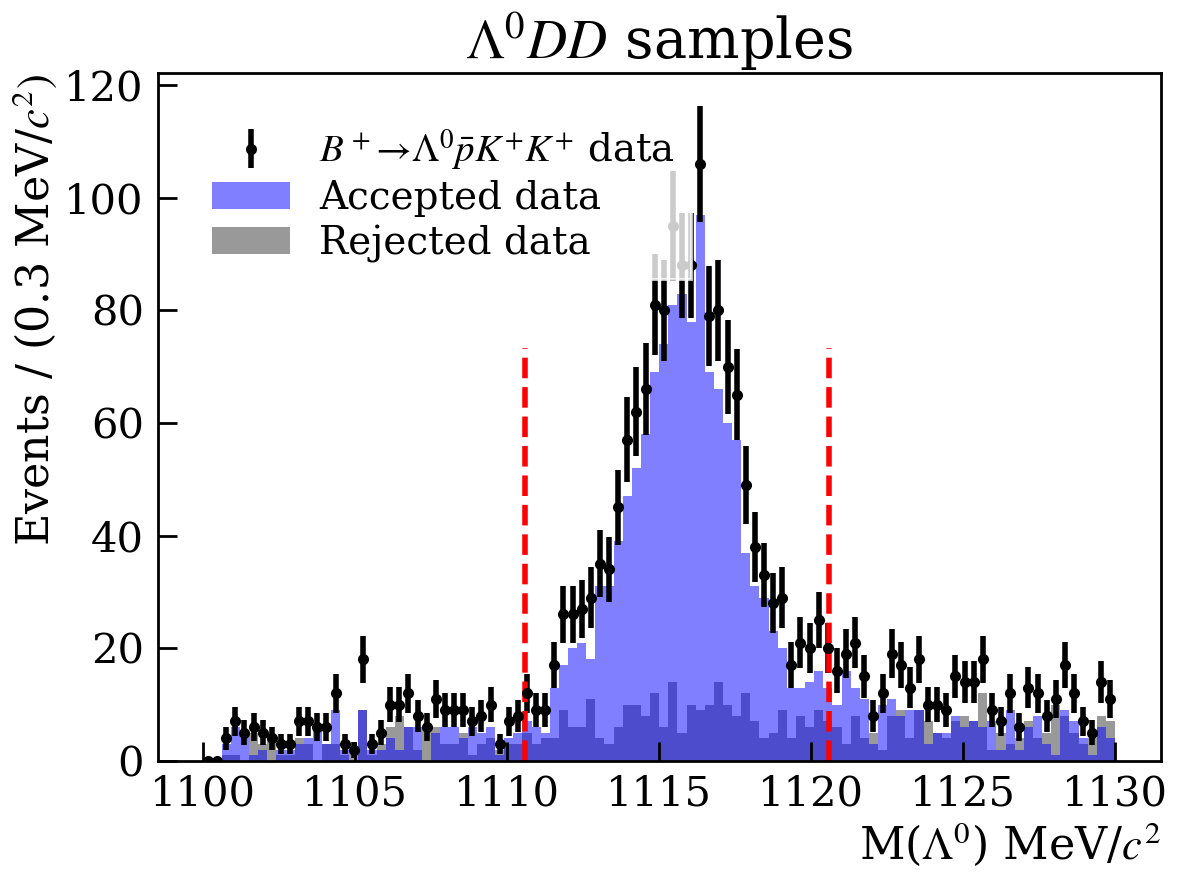

In [ ]:
fig, ax = plt.subplots()
p1 = plot_data(ax, KK_data["L0_M"].to_list(), [1100, 1130], 100, r"$B^+\to \Lambda^0\bar{p} K^{+} K^{+}$ data")
p3 = plt.hist(KK_data["L0_M"][(KK_data["Lp_ProbNNp"]<0.1)], range=[1100, 1130], bins=100, label=r"Rejected data", color='gray', alpha=0.8)
p2 = plt.hist(KK_data["L0_M"][(KK_data["Lp_ProbNNp"]>0.1)], range=[1100, 1130], bins=100, label=r"Accepted data", color='blue', alpha=0.5)
ax.axvline(x=1115.6-5, ymax=0.6, color="red", ls="--")
ax.axvline(x=1115.6+5, ymax=0.6, color="red", ls="--")
ax.set_title(f"$\Lambda^0 {track}$ samples", fontsize=40)
ax.set_xlabel(r"M($\Lambda^0$) MeV/$c^2$")
ax.set_ylabel(r"Events / (0.3 MeV/$c^2)$")
# ax.set_ylim([0, 80])

#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [2,1,0]
#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]) 
plt.savefig(f"./plots/B2L0pbarKpKp/Lambda_{track}_Lp_ProbNNp_LM.pdf")

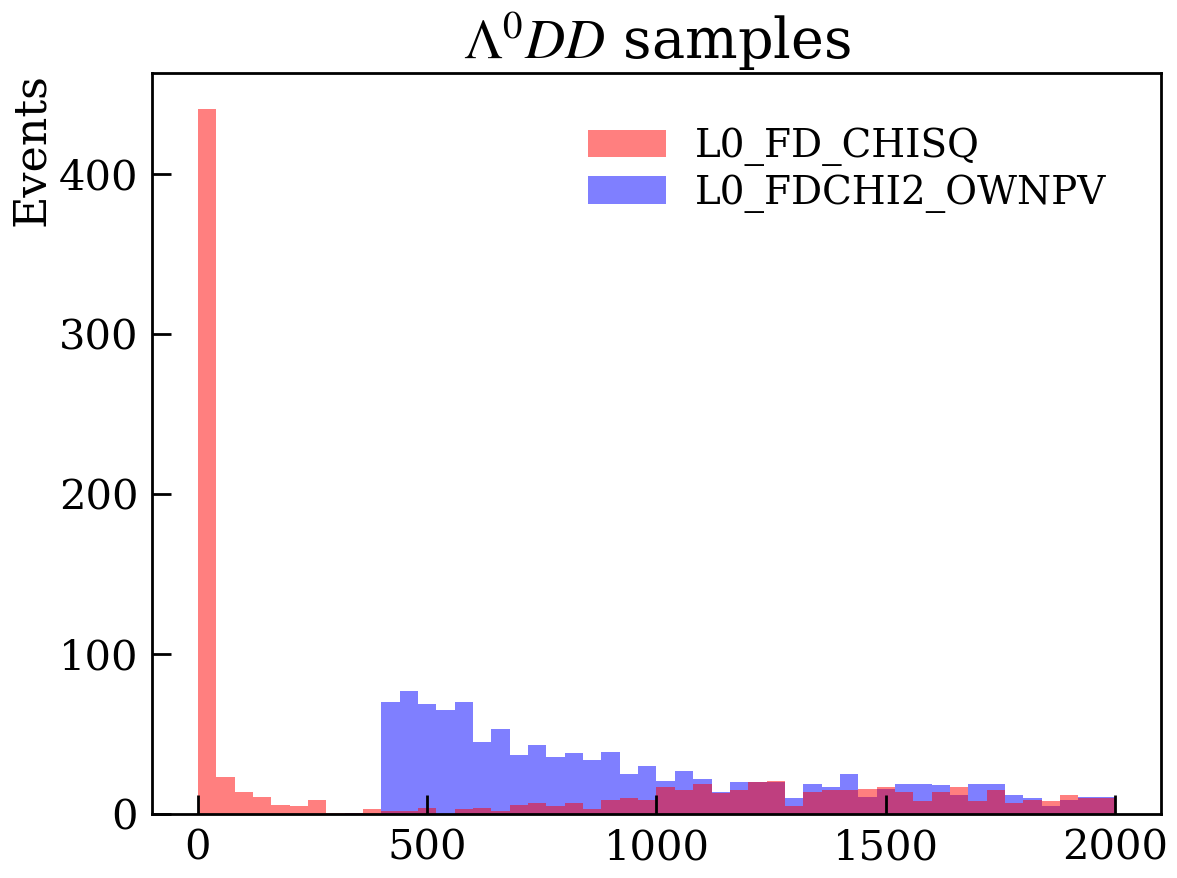

In [ ]:
fig, ax = plt.subplots()
p2 = plt.hist(KK_data["L0_FDCHI2_OWNPV"].to_list(), range=[0, 2000], bins=50, label=r"L0_FDCHI2_OWNPV", color='blue', alpha=0.5)
p1 = plt.hist(L0_FD_CHISQ.to_list(), range=[0, 2000], bins=50, label=r"L0_FD_CHISQ", color='red', alpha=0.5)
ax.set_title(f"$\Lambda^0 {track}$ samples", fontsize=40)
# ax.set_xlabel(r"L0_FD_CHISQ")
ax.set_ylabel(r"Events")
# ax.set_ylim([0, 50])

#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [1,0]
#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]) 
plt.savefig(f"./plots/B2L0pbarKpKp/L0_FD_CHISQ2.pdf")

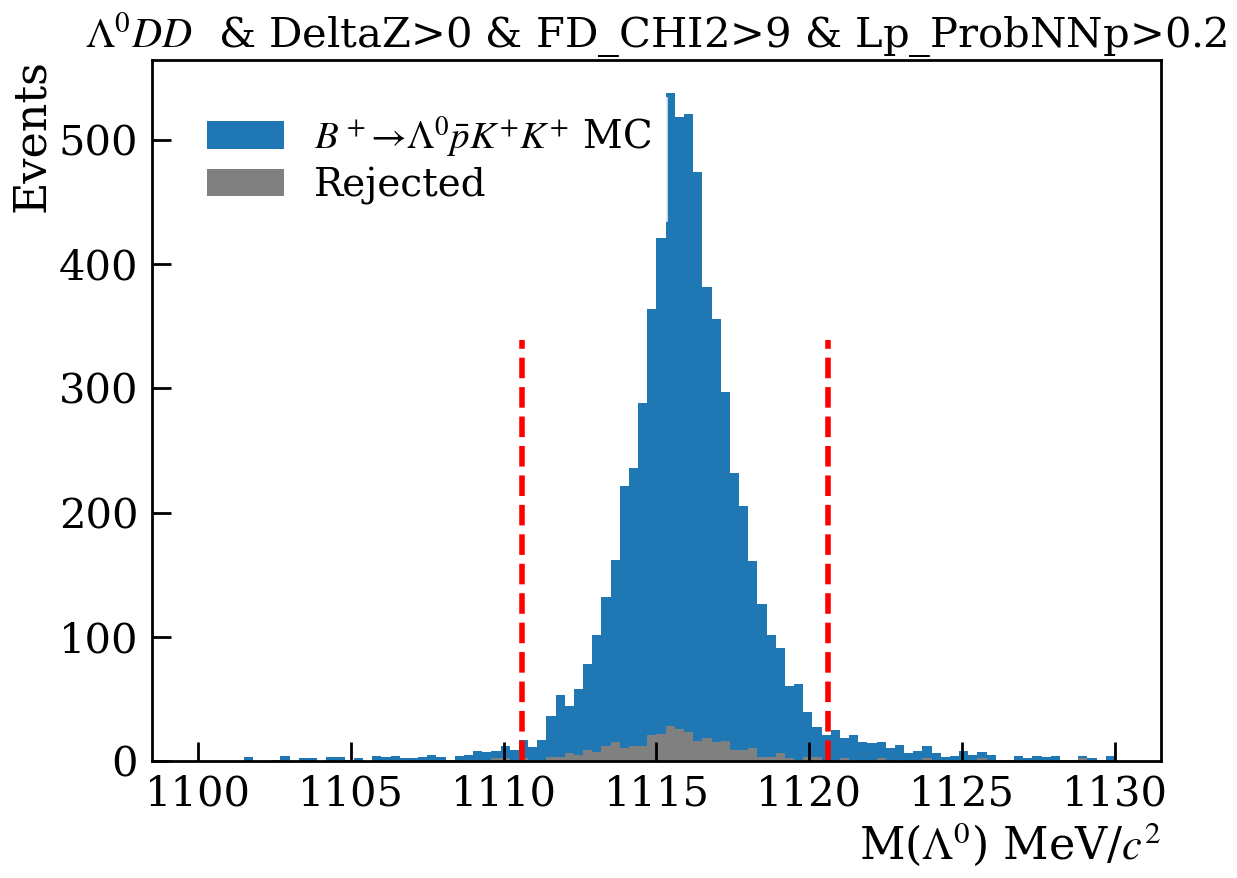

In [ ]:
fig, ax = plt.subplots()
Lp_ProbNNp = KK_mc["Lp_ProbNNp"]
p1 = plt.hist(KK_mc["L0_M"].to_list(), range=[1100, 1130], bins=100, label=r"$B^+\to \Lambda^0\bar{p} K^{+} K^{+}$ MC")
p2 = plt.hist(KK_mc["L0_M"][(Delta_Z_mc<5) | (L0_FD_CHISQ_mc<25) | (Lp_ProbNNp<0.2)].to_list(), range=[1100, 1130], bins=100, label=r"Rejected", color='gray')
ax.axvline(x=1115.6-5, ymax=0.6, color="red", ls="--")
ax.axvline(x=1115.6+5, ymax=0.6, color="red", ls="--")
ax.set_title(f"$\Lambda^0 {track}$  & DeltaZ>0 & FD_CHI2>9 & Lp_ProbNNp>0.2", fontsize=30)
ax.set_xlabel(r"M($\Lambda^0$) MeV/$c^2$")
ax.set_ylabel(r"Events")

#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [0,1]
#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]) 
plt.savefig(f"./plots/B2L0pbarKpKp//MCL0_FD_CHISQ_L0M.pdf")

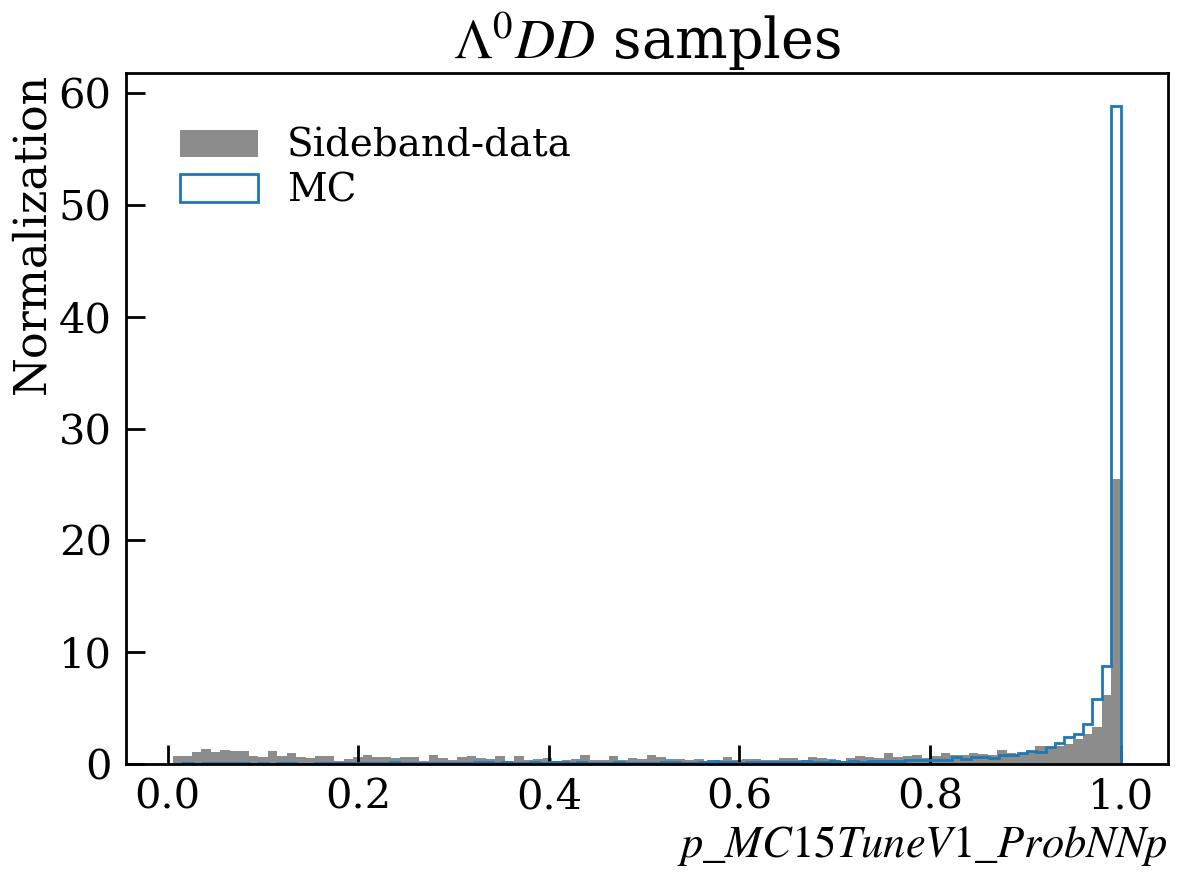

In [ ]:
plt.hist(KK_data["p_MC15TuneV1_ProbNNp"], bins=100, density=True, color="gray", alpha=0.9,label="Sideband-data")
plt.hist(KK_mc["p_MC15TuneV1_ProbNNp"], bins=100, density=True, histtype="step", label="MC")
plt.title(rf"$\Lambda^0 {track}$ samples", fontsize=40)
plt.xlabel(r"$p\_MC15TuneV1\_ProbNNp$")
plt.ylabel("Normalization")
plt.legend(loc="upper left")
plt.savefig(f"./plots/B2L0pbarKpKp//p1_ProbNNp.pdf")

# Now lets define the resonances of interest


In [ ]:
# Define the mass of the particles
K_MASS = 493.677  # MeV/c^2
P_MASS = 938.272081  # MeV/c^2
L0_MASS = 1115.683  # MeV/c^2
BU_MASS = 5279.58  # MeV/c^2

# Define the mass windows
K_MASS_WINDOW = 50  # MeV/c^2
P_MASS_WINDOW = 50  # MeV/c^2
L0_MASS_WINDOW = 50  # MeV/c^2
BU_MASS_WINDOW = 50  # MeV/c^2



In [ ]:
# Define the Lorentz vectors using vector package

h1_PX = KK_data["h1_PX"]
h1_PY = KK_data["h1_PY"]
h1_PZ = KK_data["h1_PZ"]
h1_PE = KK_data["h1_PE"]
h2_PX = KK_data["h2_PX"]
h2_PY = KK_data["h2_PY"]
h2_PZ = KK_data["h2_PZ"]
h2_PE = KK_data["h2_PE"]
p_PX  = KK_data["p_PX"]
p_PY  = KK_data["p_PY"]
p_PZ  = KK_data["p_PZ"]
p_PE  = KK_data["p_PE"]
L0_PX = KK_data["L0_PX"]
L0_PY = KK_data["L0_PY"]
L0_PZ = KK_data["L0_PZ"]
L0_PE = KK_data["L0_PE"]


K1_P  = vector.awk({"x":h1_PX, "y":h1_PY, "z":h1_PZ, "t":h1_PE})
K2_P  = vector.awk({"x":h2_PX, "y":h2_PY, "z":h2_PZ, "t":h2_PE})
p_P   = vector.awk({"x":p_PX,  "y":p_PY,  "z":p_PZ,  "t":p_PE})
L0_P  = vector.awk({"x":L0_PX,  "y":L0_PY,  "z":L0_PZ,  "t":L0_PE})

# Define the four-vector of the resonances from these particles

### KK resonances
KK_P = K1_P + K2_P
KK_MASS = np.sqrt(KK_P.t**2 - KK_P.x**2 - KK_P.y**2 - KK_P.z**2)

### Kp resonances
K1p_P = K1_P + p_P
K1p_MASS = np.sqrt(K1p_P.t**2 - K1p_P.x**2 - K1p_P.y**2 - K1p_P.z**2)
K2p_P = K2_P + p_P
K2p_MASS = np.sqrt(K2p_P.t**2 - K2p_P.x**2 - K2p_P.y**2 - K2p_P.z**2)

##### Concatenate K1p and K2p
Kp_P = ak.concatenate([K1p_P, K2p_P], axis=0)
Kp_MASS = ak.concatenate([ak.Array(K1p_MASS), ak.Array(K2p_MASS)], axis=0)

### L0 resonances

#### L0_p resonance
L0p_P = L0_P + p_P
L0p_MASS = np.sqrt(L0p_P.t**2 - L0p_P.x**2 - L0p_P.y**2 - L0p_P.z**2)

#### L0_K resonance
L0K1_P = L0_P + K1_P
L0K1_MASS = np.sqrt(L0K1_P.t**2 - L0K1_P.x**2 - L0K1_P.y**2 - L0K1_P.z**2)
L0K2_P = L0_P + K2_P
L0K2_MASS = np.sqrt(L0K2_P.t**2 - L0K2_P.x**2 - L0K2_P.y**2 - L0K2_P.z**2)

#### Concatenate L0K1 and L0K2
L0K_P = ak.concatenate([L0K1_P, L0K2_P], axis=0)
L0K_MASS = ak.concatenate([ak.Array(L0K1_MASS), ak.Array(L0K2_MASS)], axis=0)

#### L0_p_K resonances
L0pK1_P = L0p_P + K1_P
L0pK1_MASS = np.sqrt(L0pK1_P.t**2 - L0pK1_P.x**2 - L0pK1_P.y**2 - L0pK1_P.z**2)
L0pK2_P = L0p_P + K2_P
L0pK2_MASS = np.sqrt(L0pK2_P.t**2 - L0pK2_P.x**2 - L0pK2_P.y**2 - L0pK2_P.z**2)


##### Concatenate L0pK1 and L0pK2
L0pK_P = ak.concatenate([L0pK1_P, L0pK2_P], axis=0)
L0pK_MASS = ak.concatenate([ak.Array(L0pK1_MASS), ak.Array(L0pK2_MASS)], axis=0)

## pKK resonance
pKK_P = p_P + KK_P
pKK_MASS = np.sqrt(pKK_P.t**2 - pKK_P.x**2 - pKK_P.y**2 - pKK_P.z**2)


In [ ]:

# Extract the components from the MC data
h1_PX_MC = KK_mc["h1_PX"]
h1_PY_MC = KK_mc["h1_PY"]
h1_PZ_MC = KK_mc["h1_PZ"]
h1_PE_MC = KK_mc["h1_PE"]
h2_PX_MC = KK_mc["h2_PX"]
h2_PY_MC = KK_mc["h2_PY"]
h2_PZ_MC = KK_mc["h2_PZ"]
h2_PE_MC = KK_mc["h2_PE"]
p_PX_MC  = KK_mc["p_PX"]
p_PY_MC  = KK_mc["p_PY"]
p_PZ_MC  = KK_mc["p_PZ"]
p_PE_MC  = KK_mc["p_PE"]
L0_PX_MC = KK_mc["L0_PX"]
L0_PY_MC = KK_mc["L0_PY"]
L0_PZ_MC = KK_mc["L0_PZ"]
L0_PE_MC = KK_mc["L0_PE"]

# Define the Lorentz vectors using vector package for MC data
K1_P_MC = vector.awk({"x": h1_PX_MC, "y": h1_PY_MC, "z": h1_PZ_MC, "t": h1_PE_MC})
K2_P_MC = vector.awk({"x": h2_PX_MC, "y": h2_PY_MC, "z": h2_PZ_MC, "t": h2_PE_MC})
p_P_MC  = vector.awk({"x": p_PX_MC,  "y": p_PY_MC,  "z": p_PZ_MC,  "t": p_PE_MC})
L0_P_MC = vector.awk({"x": L0_PX_MC, "y": L0_PY_MC, "z": L0_PZ_MC, "t": L0_PE_MC})

# Define resonances for MC data

## KK resonances
KK_P_MC = K1_P_MC + K2_P_MC
KK_MASS_MC = np.sqrt(KK_P_MC.t**2 - KK_P_MC.x**2 - KK_P_MC.y**2 - KK_P_MC.z**2)

## pK resonances
K1p_P_MC = K1_P_MC + p_P_MC
K1p_MASS_MC = np.sqrt(K1p_P_MC.t**2 - K1p_P_MC.x**2 - K1p_P_MC.y**2 - K1p_P_MC.z**2)
K2p_P_MC = K2_P_MC + p_P_MC
K2p_MASS_MC = np.sqrt(K2p_P_MC.t**2 - K2p_P_MC.x**2 - K2p_P_MC.y**2 - K2p_P_MC.z**2)

##### Concatenate K1p and K2p
Kp_P_MC = ak.concatenate([K1p_P_MC, K2p_P_MC], axis=0)
Kp_MASS_MC = ak.concatenate([ak.Array(K1p_MASS_MC), ak.Array(K2p_MASS_MC)], axis=0)

## L0p resonance
L0p_P_MC = L0_P_MC + p_P_MC
L0p_MASS_MC = np.sqrt(L0p_P_MC.t**2 - L0p_P_MC.x**2 - L0p_P_MC.y**2 - L0p_P_MC.z**2)

## L0K resonances
L0K1_P_MC = L0_P_MC + K1_P_MC
L0K1_MASS_MC = np.sqrt(L0K1_P_MC.t**2 - L0K1_P_MC.x**2 - L0K1_P_MC.y**2 - L0K1_P_MC.z**2)
L0K2_P_MC = L0_P_MC + K2_P_MC
L0K2_MASS_MC = np.sqrt(L0K2_P_MC.t**2 - L0K2_P_MC.x**2 - L0K2_P_MC.y**2 - L0K2_P_MC.z**2)

##### Concatenate L0K1 and L0K2
L0K_P_MC = ak.concatenate([L0K1_P_MC, L0K2_P_MC], axis=0)
L0K_MASS_MC = ak.concatenate([ak.Array(L0K1_MASS_MC), ak.Array(L0K2_MASS_MC)], axis=0)

## L0pK resonances
L0pK1_P_MC = L0p_P_MC + K1_P_MC
L0pK1_MASS_MC = np.sqrt(L0pK1_P_MC.t**2 - L0pK1_P_MC.x**2 - L0pK1_P_MC.y**2 - L0pK1_P_MC.z**2)
L0pK2_P_MC = L0p_P_MC + K2_P_MC
L0pK2_MASS_MC = np.sqrt(L0pK2_P_MC.t**2 - L0pK2_P_MC.x**2 - L0pK2_P_MC.y**2 - L0pK2_P_MC.z**2)

##### Concatenate L0pK1 and L0pK2
L0pK_P_MC = ak.concatenate([L0pK1_P_MC, L0pK2_P_MC], axis=0)
L0pK_MASS_MC = ak.concatenate([ak.Array(L0pK1_MASS_MC), ak.Array(L0pK2_MASS_MC)], axis=0)

## pKK resonances
pKK_P_MC = p_P_MC + KK_P_MC
pKK_MASS_MC = np.sqrt(pKK_P_MC.t**2 - pKK_P_MC.x**2 - pKK_P_MC.y**2 - pKK_P_MC.z**2)


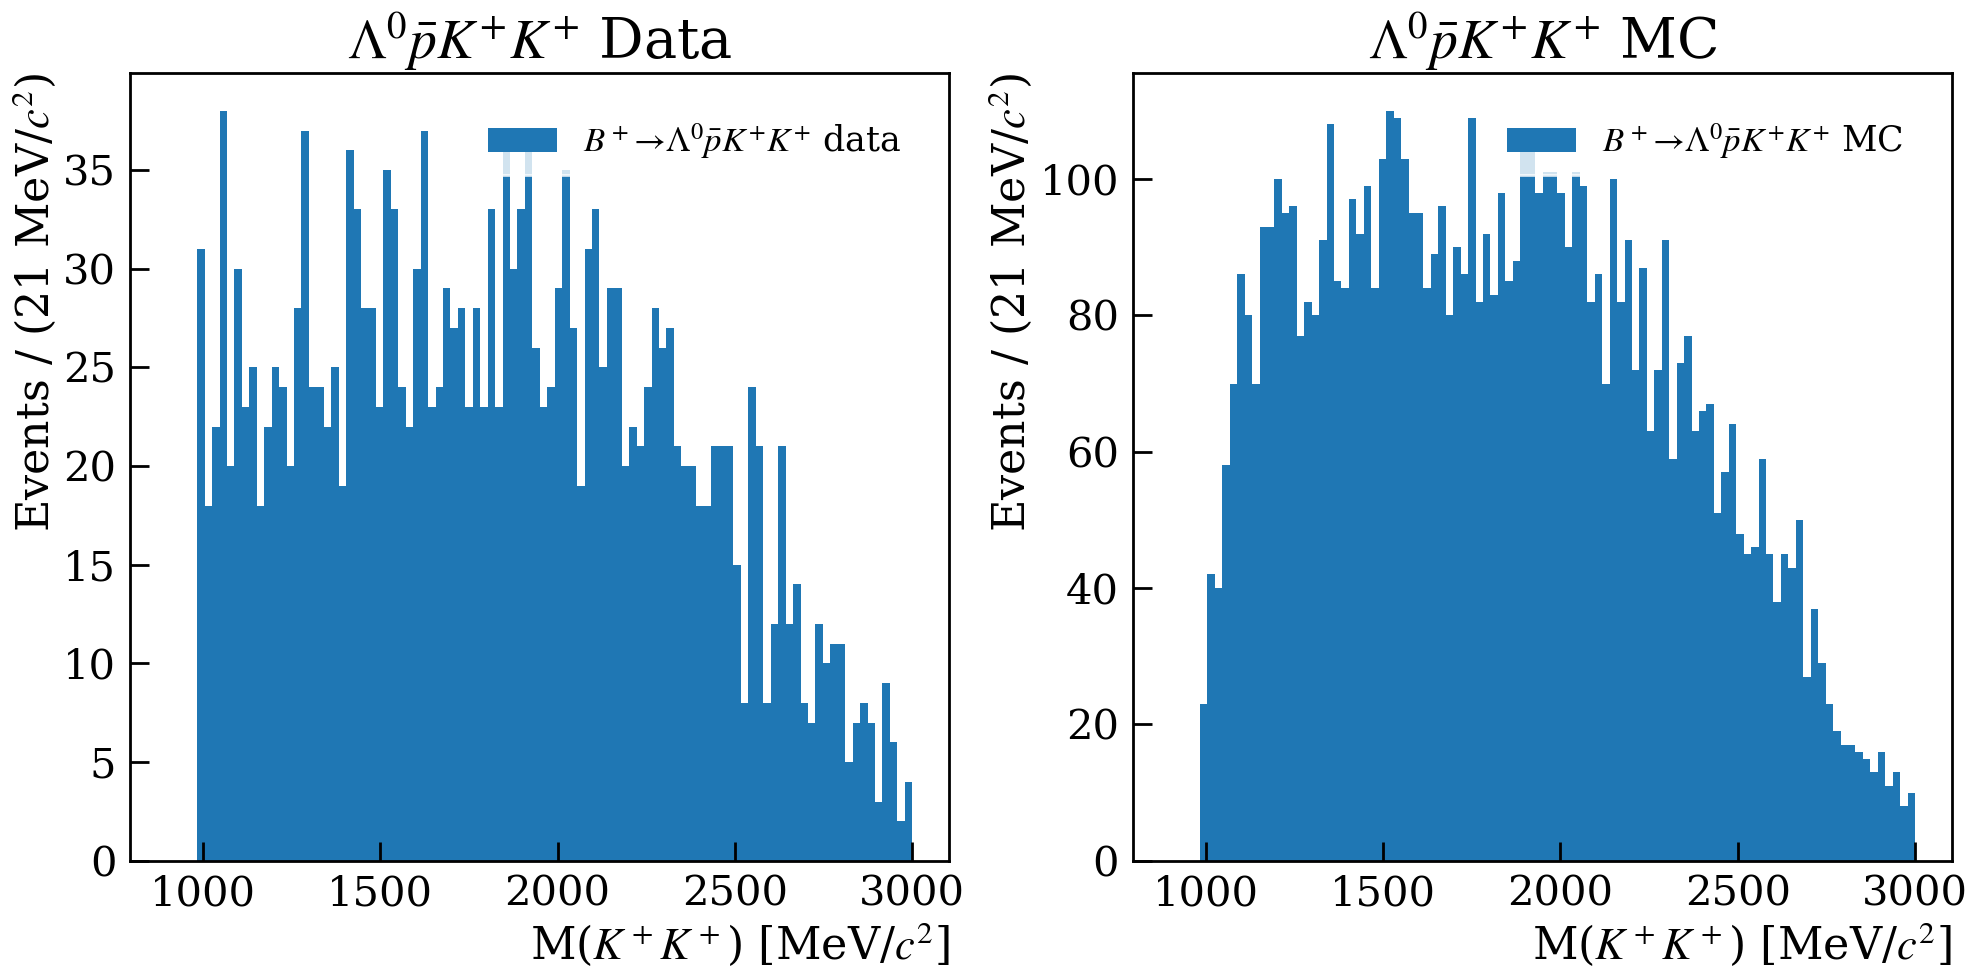

In [ ]:
## Now lets plot the resonances, we will use subplot to plot the histogram of resonance with the data and MC (left and right respectively)

## KK resonance
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].hist(KK_MASS, range=[900, 3000], bins=100, label=r"$B^+\to \Lambda^0\bar{p} K^{+} K^{+}$ data")
ax[0].set_title(r"$\Lambda^0\bar{p} K^{+} K^{+}$ Data", fontsize=40)
ax[0].set_xlabel(r"M($K^+K^+$) [MeV/$c^2$]")
ax[0].set_ylabel(r"Events / (21 MeV/$c^2$)")
ax[0].set_ylim([0, ax[0].get_ylim()[1]])  # Automatically adjust the upper limit
ax[0].legend(fontsize=25)
ax[1].hist(KK_MASS_MC, range=[900, 3000], bins=100, label=r"$B^+\to \Lambda^0\bar{p} K^{+} K^{+}$ MC")
ax[1].set_title(r"$\Lambda^0\bar{p} K^{+} K^{+}$ MC", fontsize=40)
ax[1].set_xlabel(r"M($K^+K^+$) [MeV/$c^2$]")
ax[1].set_ylabel(r"Events / (21 MeV/$c^2$)")
ax[1].set_ylim([0, ax[1].get_ylim()[1]])  # Automatically adjust the upper limit
ax[1].legend(fontsize=25)
plt.savefig("./plots/B2L0pbarKpKp/KK_M.pdf")




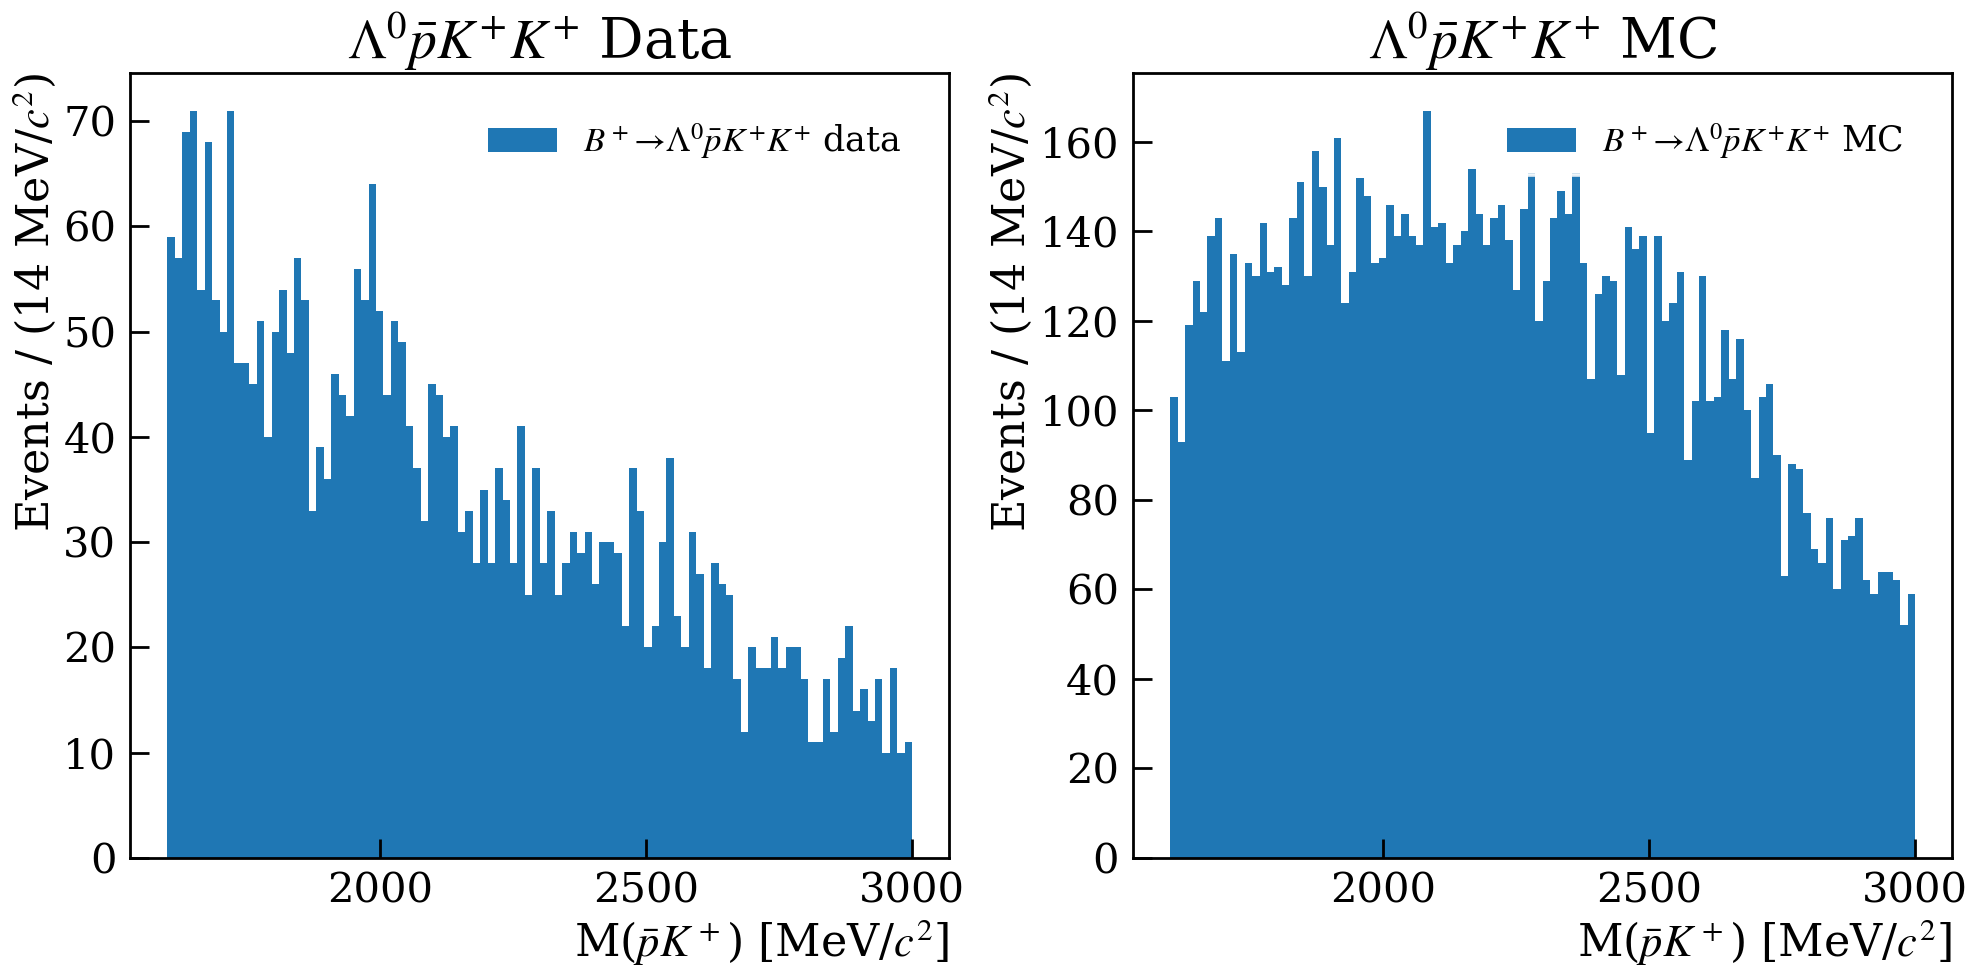

In [ ]:
## pK resonance plot 
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].hist(Kp_MASS, range=[1600, 3000], bins=100, label=r"$B^+\to \Lambda^0\bar{p} K^{+} K^{+}$ data")
ax[0].set_title(r"$\Lambda^0\bar{p} K^{+} K^{+}$ Data", fontsize=40)
ax[0].set_xlabel(r"M($\bar{p} K^+$) [MeV/$c^2$]")
ax[0].set_ylabel(r"Events / (14 MeV/$c^2$)")
ax[0].set_ylim([0, ax[0].get_ylim()[1]])  # Automatically adjust the upper limit
ax[0].legend(fontsize=25)
ax[1].hist(Kp_MASS_MC, range=[1600, 3000], bins=100, label=r"$B^+\to \Lambda^0\bar{p} K^{+} K^{+}$ MC")
ax[1].set_title(r"$\Lambda^0\bar{p} K^{+} K^{+}$ MC", fontsize=40)
ax[1].set_xlabel(r"M($\bar{p} K^+$) [MeV/$c^2$]")
ax[1].set_ylabel(r"Events / (14 MeV/$c^2$)")
ax[1].set_ylim([0, ax[1].get_ylim()[1]])  # Automatically adjust the upper limit
ax[1].legend(fontsize=25)
plt.savefig("./plots/B2L0pbarKpKp/pK_M.pdf")




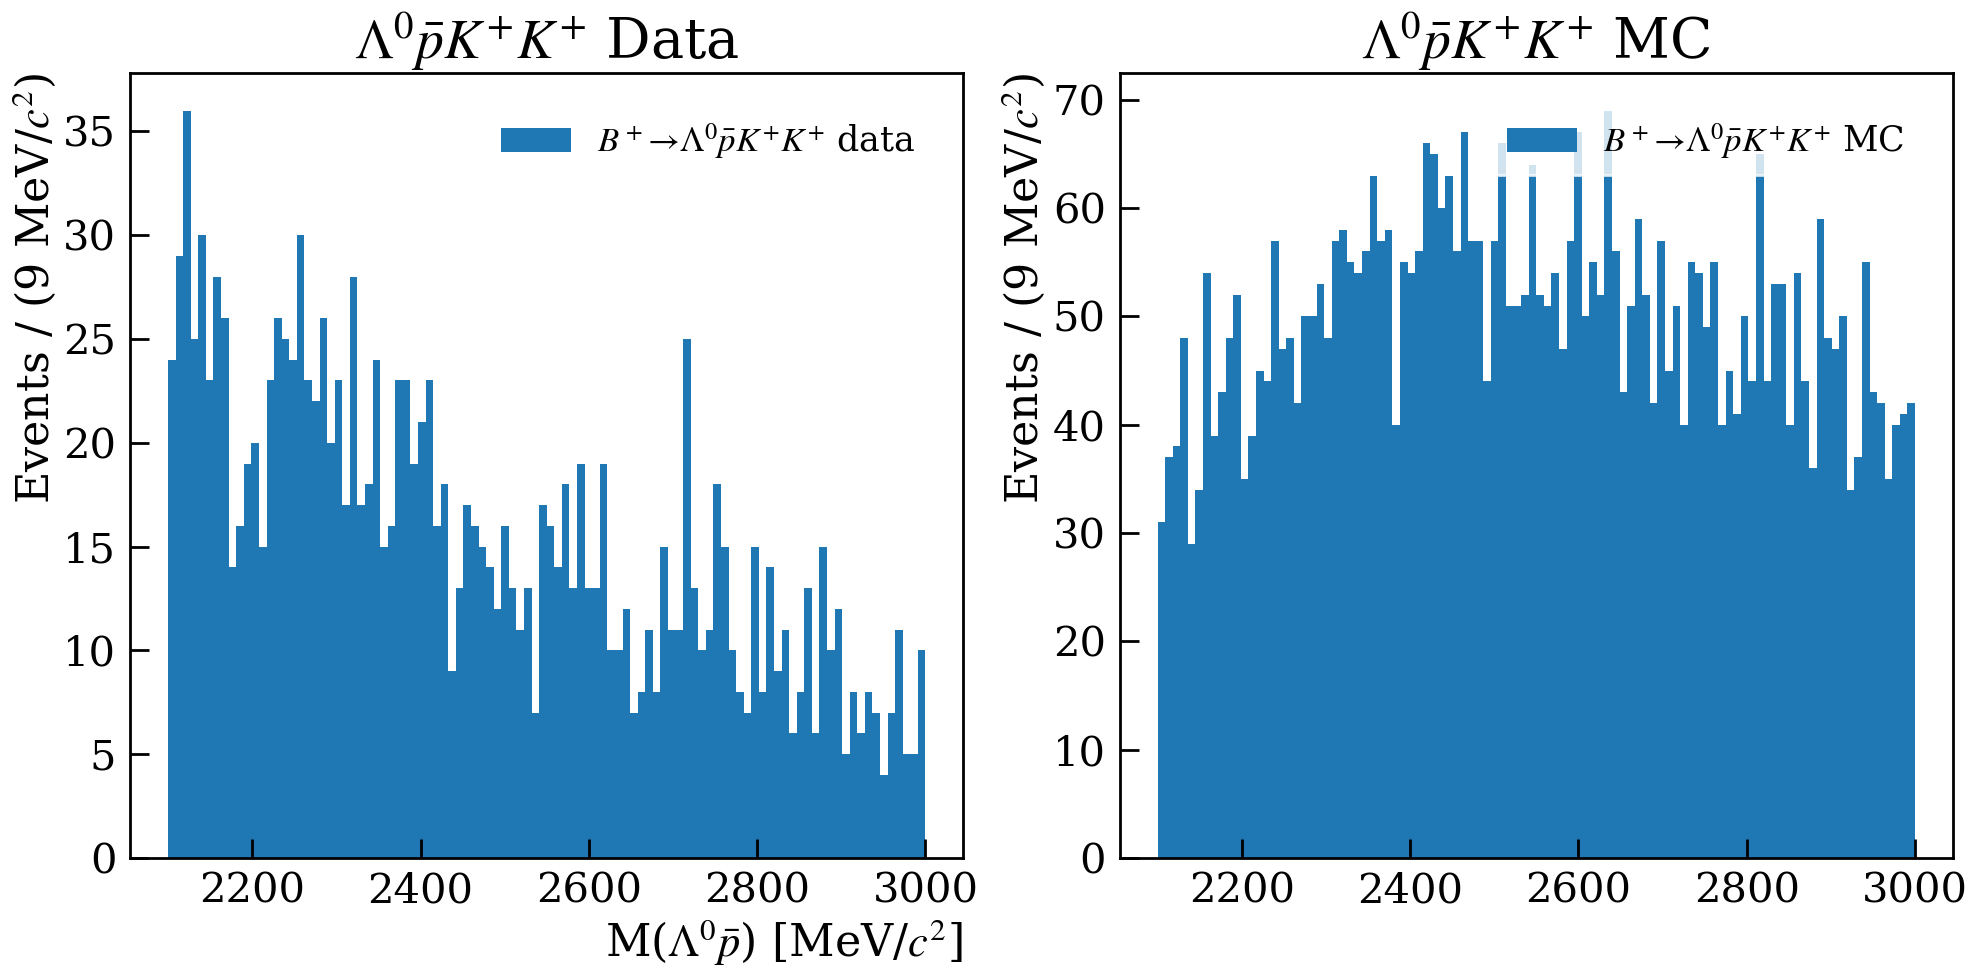

In [ ]:
## L0p resonance

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].hist(L0p_MASS, range=[2100, 3000], bins=100, label=r"$B^+\to \Lambda^0\bar{p} K^{+} K^{+}$ data")
ax[0].set_title(r"$\Lambda^0\bar{p} K^{+} K^{+}$ Data", fontsize=40)
ax[0].set_xlabel(r"M($\Lambda^0 \bar{p} $) [MeV/$c^2$]")
ax[0].set_ylabel(r"Events / (9 MeV/$c^2$)")
ax[0].set_ylim([0, ax[0].get_ylim()[1]])  # Automatically adjust the upper limit
ax[0].legend(fontsize=25)
ax[1].hist(L0p_MASS_MC, range=[2100, 3000], bins=100, label=r"$B^+\to \Lambda^0\bar{p} K^{+} K^{+}$ MC")
ax[1].set_title(r"$\Lambda^0\bar{p} K^{+} K^{+}$ MC", fontsize=40)
ax[0].set_xlabel(r"M($\Lambda^0 \bar{p} $) [MeV/$c^2$]")
ax[1].set_ylabel(r"Events / (9 MeV/$c^2$)")
ax[1].set_ylim([0, ax[1].get_ylim()[1]])  # Automatically adjust the upper limit
ax[1].legend(fontsize=25)
plt.savefig("./plots/B2L0pbarKpKp/L0p_M.pdf")



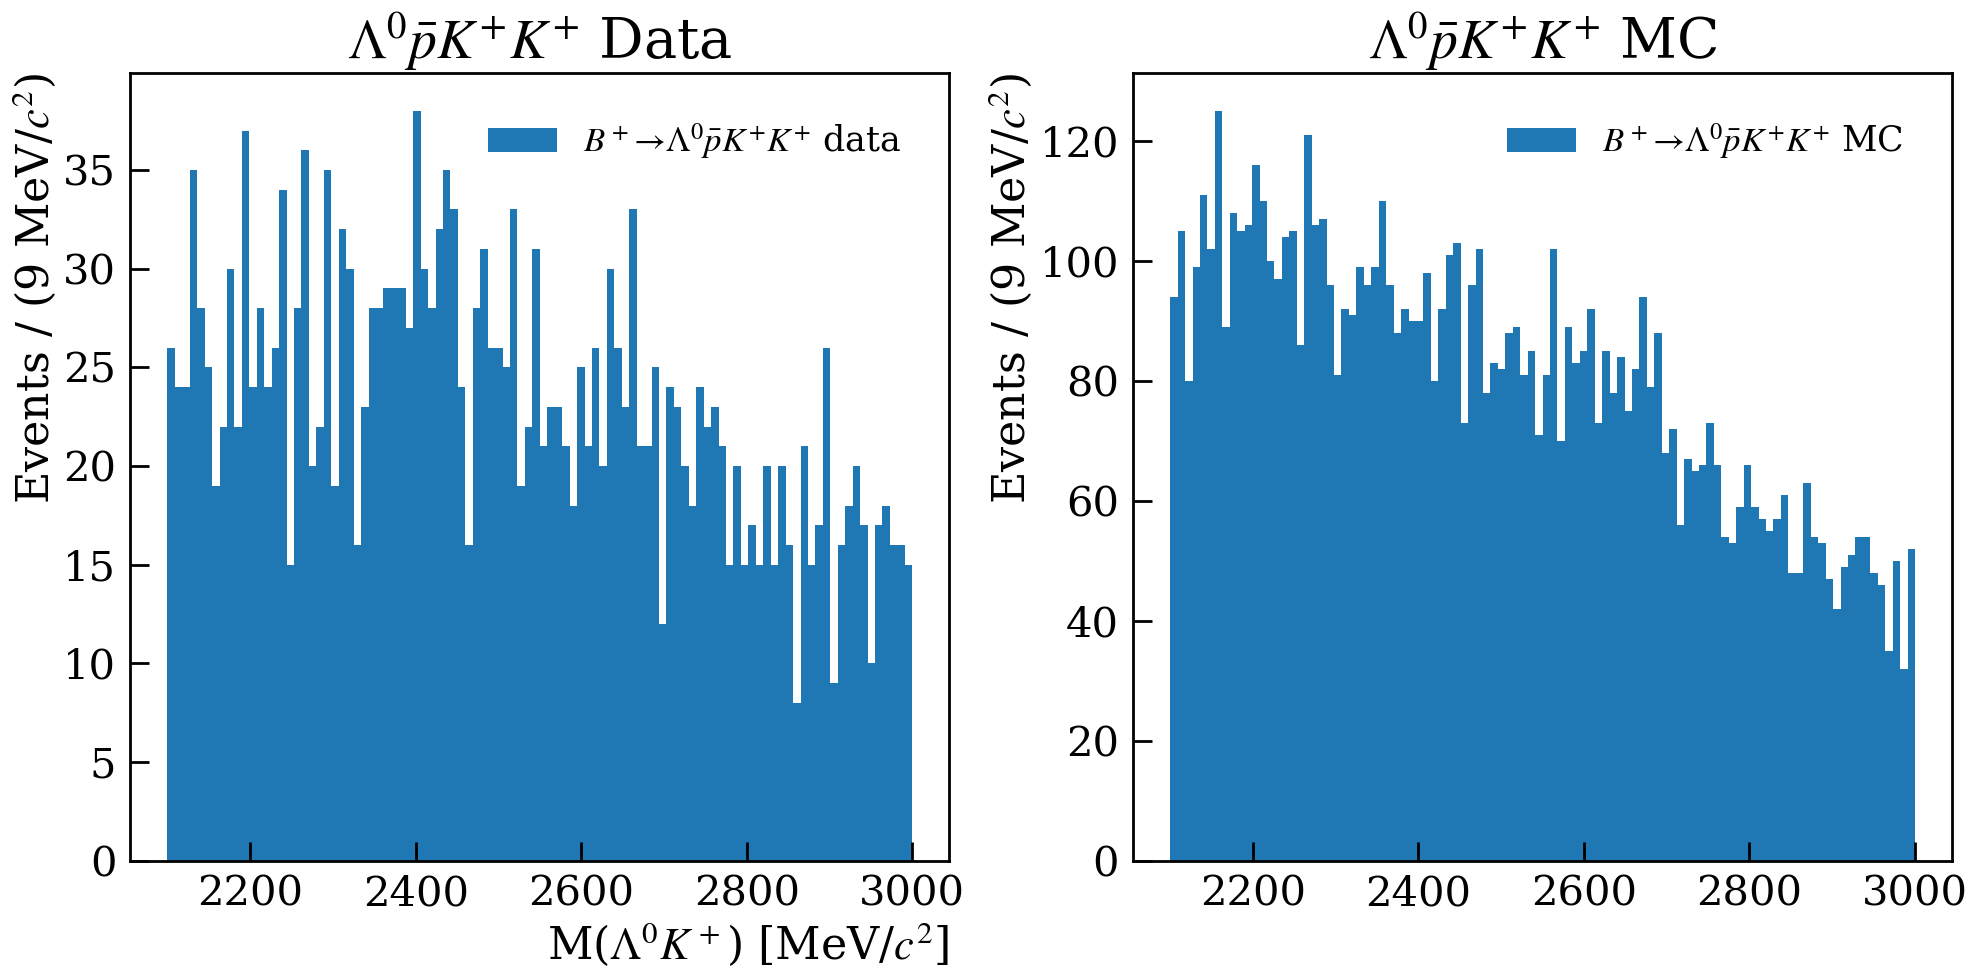

In [ ]:
# L0K

## L0K resonance

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].hist(L0K_MASS, range=[2100, 3000], bins=100, label=r"$B^+\to \Lambda^0\bar{p} K^{+} K^{+}$ data")
ax[0].set_title(r"$\Lambda^0\bar{p} K^{+} K^{+}$ Data", fontsize=40)
ax[0].set_xlabel(r"M($\Lambda^0 K^+ $) [MeV/$c^2$]")
ax[0].set_ylabel(r"Events / (9 MeV/$c^2$)")
ax[0].set_ylim([0, ax[0].get_ylim()[1]])  # Automatically adjust the upper limit
ax[0].legend(fontsize=25)
ax[1].hist(L0K_MASS_MC, range=[2100, 3000], bins=100, label=r"$B^+\to \Lambda^0\bar{p} K^{+} K^{+}$ MC")
ax[1].set_title(r"$\Lambda^0\bar{p} K^{+} K^{+}$ MC", fontsize=40)
ax[0].set_xlabel(r"M($\Lambda^0 K^+ $) [MeV/$c^2$]")
ax[1].set_ylabel(r"Events / (9 MeV/$c^2$)")
ax[1].set_ylim([0, ax[1].get_ylim()[1]])  # Automatically adjust the upper limit
ax[1].legend(fontsize=25)
plt.savefig("./plots/B2L0pbarKpKp/L0K_M.pdf")




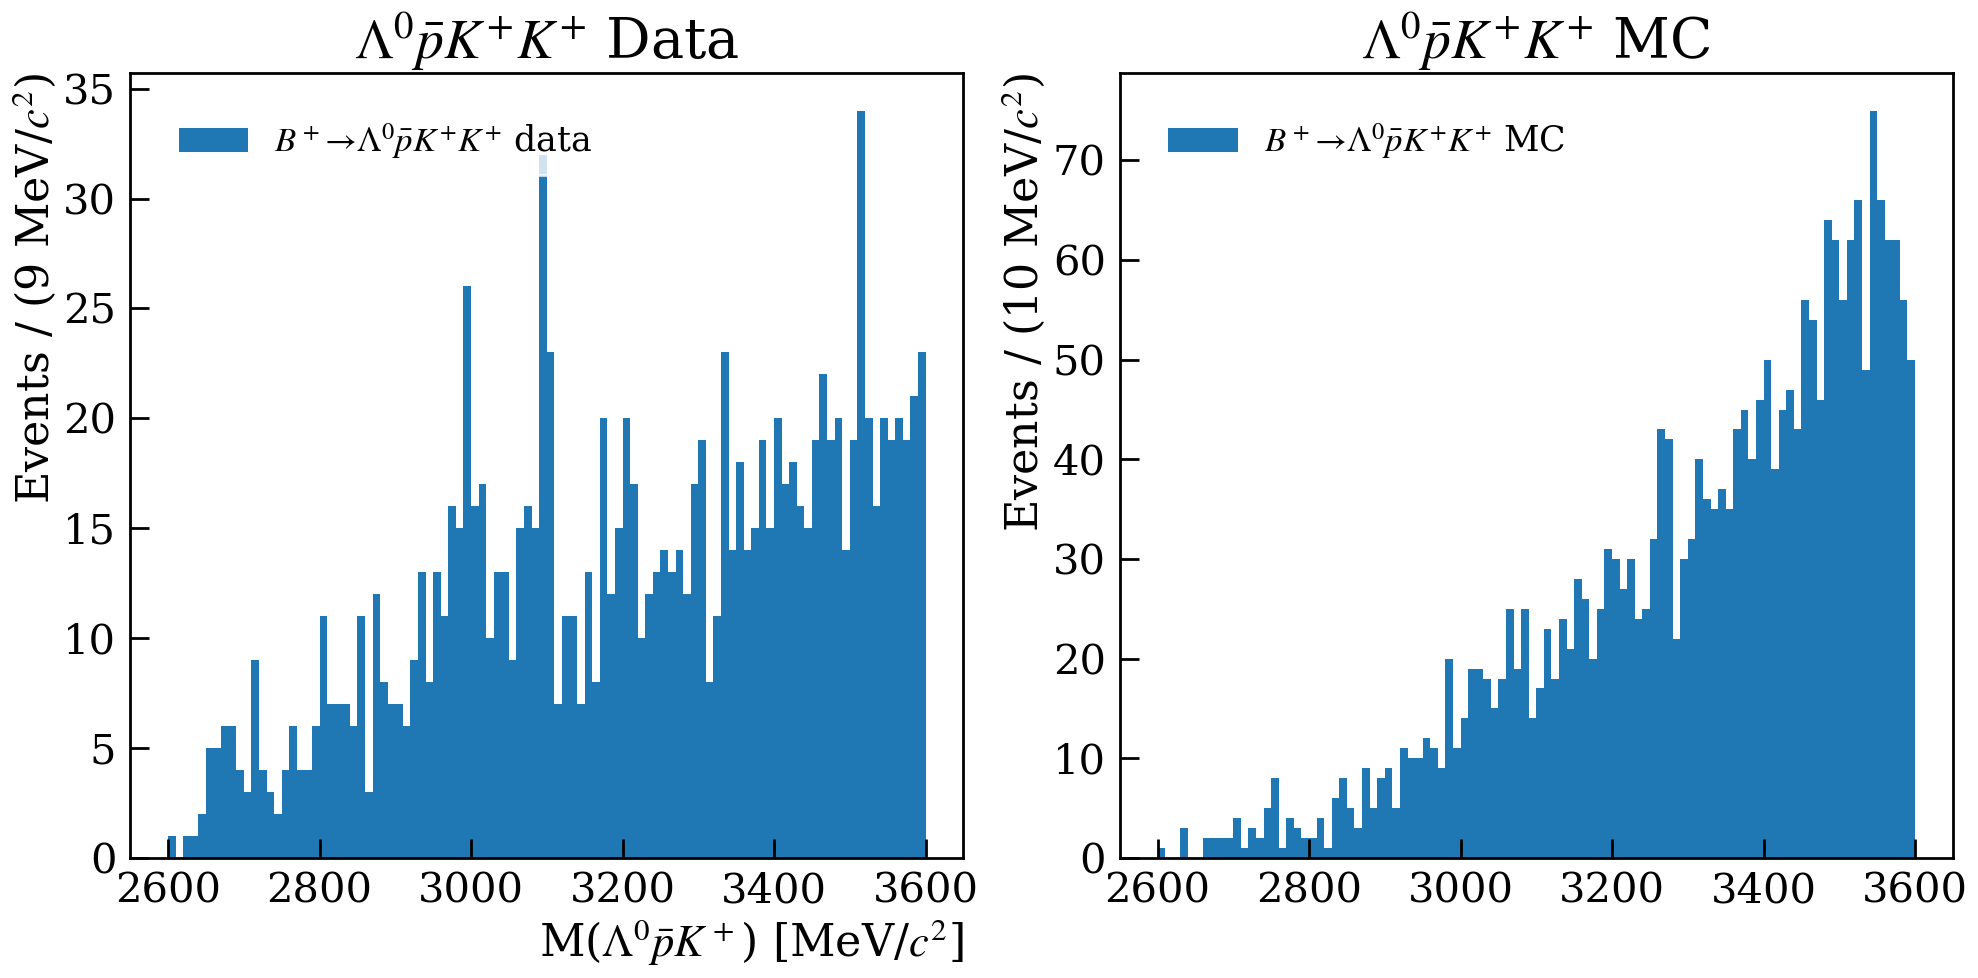

In [ ]:
## L0pK resonances

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].hist(L0pK_MASS, range=[2600, 3600], bins=100, label=r"$B^+\to \Lambda^0\bar{p} K^{+} K^{+}$ data")
ax[0].set_title(r"$\Lambda^0\bar{p} K^{+} K^{+}$ Data", fontsize=40)
ax[0].set_xlabel(r"M($\Lambda^0 \bar{p} K^+ $) [MeV/$c^2$]")
ax[0].set_ylabel(r"Events / (9 MeV/$c^2$)")
ax[0].set_ylim([0, ax[0].get_ylim()[1]])  # Automatically adjust the upper limit
ax[0].legend(fontsize=25)
ax[1].hist(L0pK_MASS_MC, range=[2600, 3600], bins=100, label=r"$B^+\to \Lambda^0\bar{p} K^{+} K^{+}$ MC")
ax[1].set_title(r"$\Lambda^0\bar{p} K^{+} K^{+}$ MC", fontsize=40)
ax[0].set_xlabel(r"M($\Lambda^0 \bar{p} K^+ $) [MeV/$c^2$]")
ax[1].set_ylabel(r"Events / (10 MeV/$c^2$)")
ax[1].set_ylim([0, ax[1].get_ylim()[1]])  # Automatically adjust the upper limit
ax[1].legend(fontsize=25)
plt.savefig("./plots/B2L0pbarKpKp/L0pK_M.pdf")


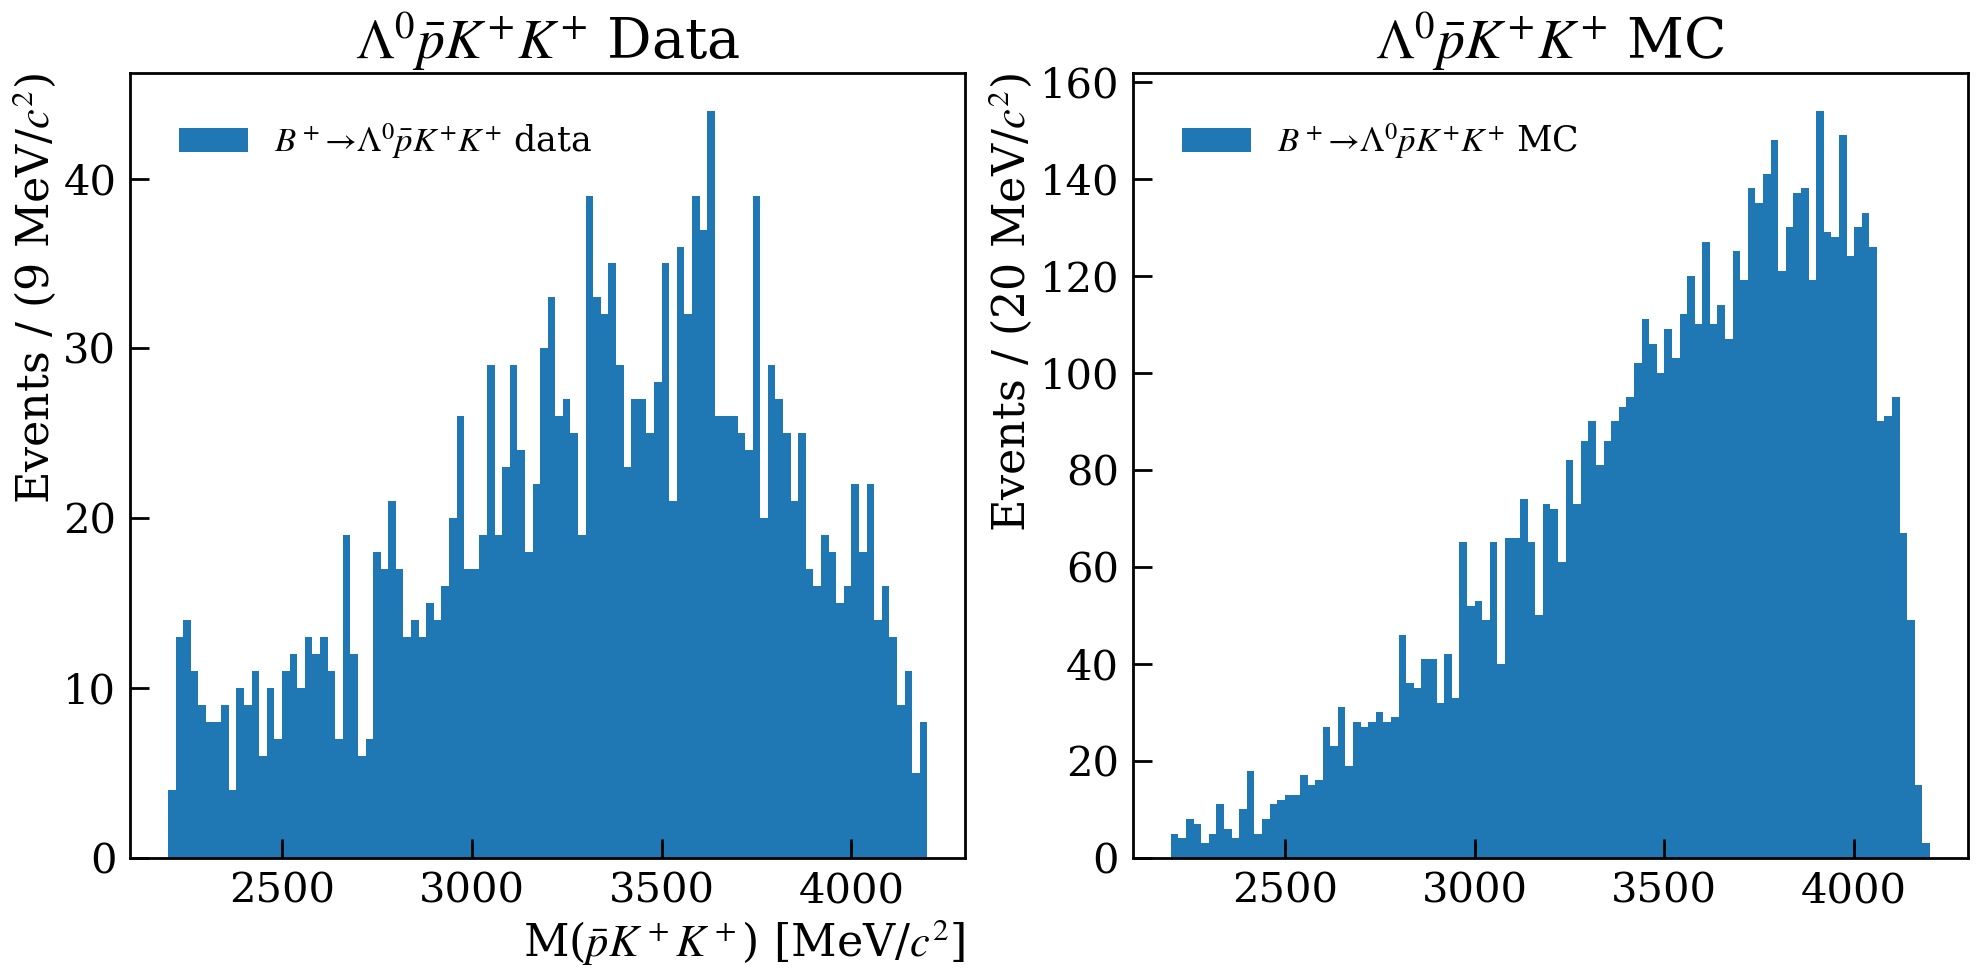

In [ ]:
## pKK resonances
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].hist(pKK_MASS, range=[2200, 4200], bins=100, label=r"$B^+\to \Lambda^0\bar{p} K^{+} K^{+}$ data")
ax[0].set_title(r"$\Lambda^0\bar{p} K^{+} K^{+}$ Data", fontsize=40)
ax[0].set_xlabel(r"M($\bar{p} K^+ K^+ $) [MeV/$c^2$]")
ax[0].set_ylabel(r"Events / (9 MeV/$c^2$)")
ax[0].set_ylim([0, ax[0].get_ylim()[1]])  # Automatically adjust the upper limit
ax[0].legend(fontsize=25)
ax[1].hist(pKK_MASS_MC, range=[2200, 4200], bins=100, label=r"$B^+\to \Lambda^0\bar{p} K^{+} K^{+}$ MC")
ax[1].set_title(r"$\Lambda^0\bar{p} K^{+} K^{+}$ MC", fontsize=40)
ax[0].set_xlabel(r"M($\bar{p} K^+ K^+ $) [MeV/$c^2$]")
ax[1].set_ylabel(r"Events / (20 MeV/$c^2$)")
ax[1].set_ylim([0, ax[1].get_ylim()[1]])  # Automatically adjust the upper limit
ax[1].legend(fontsize=25)
plt.savefig("./plots/B2L0pbarKpKp/pKK.pdf")

